# Health Insurance Cross Sell Prediction
 
**Problem Statement**

An insurance company aims to enhance its customer base for vehicle insurance by identifying health insurance customers who are genuinely interested in purchasing it. Despite having access to extensive customer data—including demographics, vehicle details, and policy information—the company struggles to effectively target potential buyers. This leads to wasted marketing efforts on uninterested customers, reduced efficiency, and missed opportunities to grow its customer base. The core challenge is to accurately predict customer interest in vehicle insurance to drive informed marketing strategies and attract the right audience.

**Objective** 

The goal of this project is to develop a machine learning model capable of predicting whether a customer, already holding health insurance, would be interested in purchasing vehicle insurance. By leveraging customer demographics (e.g., age, gender, and region), vehicle details (e.g., age and damage history), and policy attributes (e.g., premium amount and sourcing channel), the model will deliver precise predictions. This will help the insurance company focus its resources on high-potential customers, increasing conversion rates, improving marketing efficiency, and expanding its customer base. 

**Data Description**

- **id**: Unique ID for customer
- **Age**: Age of the customer
- **Driving_License** : 0 - Customer has Driving License. 1 - Customer has Driving license.
- **Region_Code**: Unique code for the region of the customer
- **Previously_Insured** : 1 - Customer has Vehicle Insurance. 0 - Customer doesn't have Vehicle Insurance
- **Vehicle_Age**: Age of the Vehicle
- **Vehicle_Damage** 1 : Past damages present or not
- **Annual_Premium**: The amount customer needs to pay as premium
- **PolicySalesChannel**: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- **Vintage**: Number of Days, Customer has been associated with the company
- **Response** :Customer is interested or not

In [1]:
# Importing necessary Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')  

In [2]:
# Load the data 
df_train = pd.read_csv("/home/karthikponna/kittu/Health Insurance Cross Sell Prediction Mlops Project/Health-Insurance-Cross-Sell-Prediction-Mlops/data/artifacts/train.csv")
df_train.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

## Basic EDA

In [3]:
from analyze_src.basic_data_inspection import DataInspector,VIFInspectionStrategy, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy, DataWranglingInspectionStrategy
 
# Initialize the Data Inspector with a strategy for Data Types Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df_train)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None


In [4]:
# Switching Data Inspector strategy to Data Wrangling Inspection
data_inspector.set_strategy(DataWranglingInspectionStrategy())
data_inspector.execute_inspection(df_train)


Data Wrangling Summary:
                  Column    Dtype  Null Count  Null (%)  Unique Count  \
0                     id    int64           0       0.0        381109   
1                 Gender   object           0       0.0             2   
2                    Age    int64           0       0.0            66   
3        Driving_License    int64           0       0.0             2   
4            Region_Code  float64           0       0.0            53   
5     Previously_Insured    int64           0       0.0             2   
6            Vehicle_Age   object           0       0.0             3   
7         Vehicle_Damage   object           0       0.0             2   
8         Annual_Premium  float64           0       0.0         48838   
9   Policy_Sales_Channel  float64           0       0.0           155   
10               Vintage    int64           0       0.0           290   
11              Response    int64           0       0.0             2   

                         

### Descriptive Statistics

In [5]:
# Switching Data Inspector strategy to Summary Statistics Inspection 
# ------------------------------------
# Statistical summary of numerical and categorical features
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df_train)


Summary Statistics (Numerical Features):
                  id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000         

### MultiCollonearity

In [6]:
# Switching Data Inspector to Variance inflation factor Strategy 
# ------------------------------------
# Perform Multicollinearity checks
data_inspector.set_strategy(VIFInspectionStrategy())
data_inspector.execute_inspection(df_train)


VIF Inspection Results:
              variables        VIF
0                   Age  10.452843
1       Driving_License  35.186725
2           Region_Code   4.954016
3    Previously_Insured   1.986280
4        Annual_Premium   4.174542
5  Policy_Sales_Channel   7.749016
6               Vintage   4.373156


### Finding Missing values

In [35]:
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
# Missing Values Analysis
# ------------------------------------
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df_train)


Missing Values Count by Column:
No missing values in the dataset
No missing values to visualize


### Dataset Insights

### 1. Basic Data Information
- The dataset contains **381,109 entries** and **12 columns**.
- **Data Types:** 
  - 3 float64 columns (e.g., `Region_Code`, `Annual_Premium`)
  - 6 int64 columns (e.g., `id`, `Age`, `Driving_License`)
  - 3 object columns (e.g., `Gender`, `Vehicle_Age`, `Vehicle_Damage`) 

### 2. Missing Values
- **No missing values** are present in any columns.
- **No need for imputation** or missing data handling, ensuring data completeness.

### 3. Summary Statistics (Numerical Features)
- **`Id`:**
  - This column serves as a unique identifier for each entry in the dataset and does not contain any useful information for model training or prediction.
  
- **`Age`:** 
  - Ranges from 20 to 85 years with a mean of approximately 38.82.
  - **Potential outliers:** While the age range seems reasonable, further analysis can be done to check if older or younger individuals disproportionately affect the target variable (`Response`).

- **`Driving_License`:**
  - Binary feature (1 = Yes, 0 = No), with 99.8% having a driving license.
  - Indicates most customers have the legal capacity to drive.
  
- **`Annual_Premium`:**
  - Mean value is 30,564 with a wide range (min = 2,630, max = 540,165).
  - **Outliers:** The high maximum value could indicate potential outliers. Consider capping or transforming this feature if it negatively affects the model performance.

- **`Previously_Insured`:**
  - Binary feature (1 = Yes, 0 = No) with a mean of approximately 0.46, indicating nearly half of the customers were previously insured.
  - This could correlate with the likelihood of response.

- **`Vintage`:**
  - Represents the number of days since the policy was purchased, with a mean of 154 days.
  - Values range between 10 and 299 days, showing a relatively even distribution.

- **`Region_Code`:**

  - Represents different geographical regions as float values, ranging from 0 to 52.
  - Could be treated as categorical or ordinal depending on analysis needs. Explore regional effects on response rates and investigate if certain regions have higher or lower response rates.

- **`Policy_Sales_Channel`:**

  - Numeric values representing different sales channels, with a mean of approximately 112.03.
  - May have a significant impact on the likelihood of response. Consider analyzing the distribution of responses across different channels to identify which channels perform better.

- **`Response`:**
  - The target variable indicating whether the customer responded positively.
  - The mean is 0.122, suggesting class imbalance (only about 12% positive responses).

### 4. Summary Statistics (Categorical Features)
- **`Gender`:**
  - Two unique values, with a higher frequency of `Male` customers (54%).
  
- **`Vehicle_Age`:**
  - It has three categories: `> 2 Years`, `1-2 Year`, `< 1 Year`.
  - Majority of vehicles fall in the `1-2 Year` category (approximately 52%).

- **`Vehicle_Damage`:**
  - Binary values (`Yes`, `No`), with a higher frequency of vehicles having damage (`Yes` = 50%).

### 5. Outliers
- **`Annual_Premium`** shows possible outliers due to its wide range and high maximum value. These outliers could lead to skewed model performance. It’s recommended to either cap or log-transform this feature for better handling.
- **Other numerical features** such as `Age` and `Vintage` do not show extreme outliers but should be reviewed in correlation with the target variable.

### 6. Feature Encoding
- **`Gender`:** Can be encoded as binary (e.g., Male = 0, Female = 1) using Labelencoding.
- **`Vehicle_Age`:** Ordinal encoding can be applied as it has an inherent order (`< 1 Year` < `1-2 Year` < `> 2 Years`).
- **`Vehicle_Damage`:** Can also be encoded as binary (e.g., Yes = 1, No = 0) using Labelencoding.

### 7. Feature Engineering
- **Interaction Terms:** There may be interaction effects between features such as `Vehicle_Age`, `Vehicle_Damage`, and `Annual_Premium`. Creating interaction terms could help capture these relationships.
- **Binning:** Consider binning features like `Age` and `Annual_Premium` into groups to reduce noise from potential outliers and create smoother trends.
- **Target Encoding:** For categorical variables like `Policy_Sales_Channel` with many unique values, you could explore frequency encoding based on the response rate.

### 8. Multicollinearity
- **Driving_License** has the highest VIF of **35.19**, indicating significant multicollinearity. This suggests that `Driving_License` is highly correlated with other variables, and it might need to be reconsidered in your model, either by removing it or combining it with other features.
- **Age** has a VIF of **10.45**, which is on the higher side, and suggests moderate multicollinearity with other features. It might be worth investigating further to see if it’s affecting model performance or if it's redundant with other features.
- **Region_Code**, **Previously_Insured**, **Annual_Premium**, **Policy_Sales_Channel**, and **Vintage** all have VIF values **less than 10**, which generally indicates acceptable levels of multicollinearity
. These features are less likely to cause issues in the regression model.


### 9. Correlation Analysis
- **Correlation of Numerical Features with Target (`Response`):**
  - **Low correlation expected** for features like `Region_Code` and `Vintage` based on their independent nature.
  - **`Annual_Premium` and `Response`:** Could potentially show some correlation, especially if high premiums correlate with positive responses.

### Issues to Address
- **Class Imbalance:** The target variable `Response` shows significant class imbalance (only ~12% positive responses). Techniques such as **SMOTE** (Synthetic Minority Oversampling Technique) or **undersampling** may be needed to balance the classes.
- **Outliers in `Annual_Premium`:** Address potential outliers through transformations (log or square root) or capping to avoid skewing model results.
- **Feature Scaling:** Since features like `Annual_Premium` have a large range, **scaling** (e.g., Min-Max Scaling or Standardization) should be applied to improve model performance.
- **Encoding:** Proper encoding techniques should be applied to categorical variables to convert them into numerical format for model input.
- **Multicollinearity:** Consider removing or combining highly collinear features like `Driving_License` to improve model stability.

## Data Visualization

#### 1. **Univariate Analysis**

##### **a) Categorical feature Analysis**

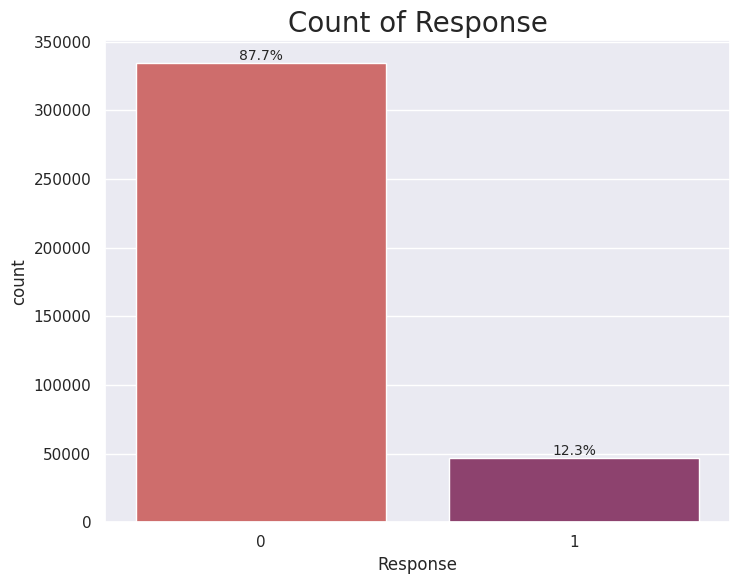

In [12]:
from analyze_src.univariate_analysis import CategoricalAnalysis,NumericalAnalysis, VisualizationContext

# Analyzing a Categorical Features
univariate_analyzer = VisualizationContext(CategoricalAnalysis())

univariate_analyzer.execute_analysis(df_train, feature='Response', is_categorical=True)

From the above plots, it is evident that the classes in the `Response` column are imbalanced. Only 12.3% people are interested in buying the Vehicle insurance. 

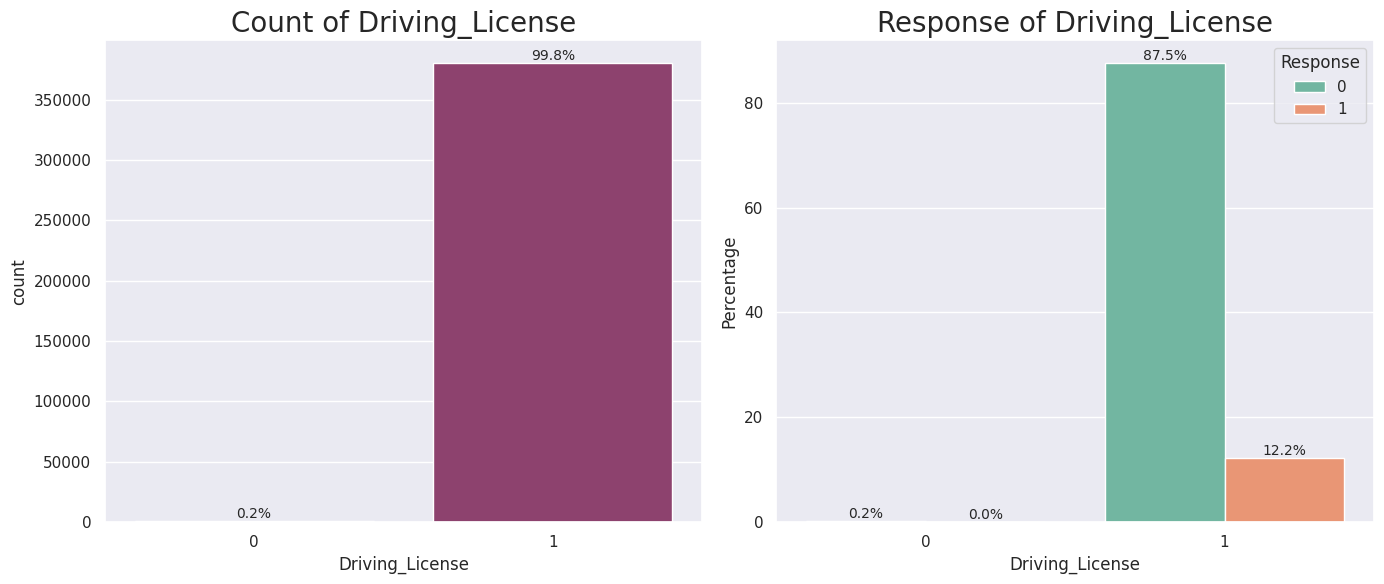

In [13]:
univariate_analyzer.execute_analysis(df_train, feature='Driving_License', is_categorical=True, group_by="Response")

**Driving License Ownership**:  
   - The dataset reveals that **99.8%** of customers possess a Driving License.  
   - A very small percentage (**0.2%**) of customers do not have a Driving License.

**Interest in Vehicle Insurance Among License Holders**:  
   - Among customers with a Driving License, only **12.2%** show interest in purchasing vehicle insurance.

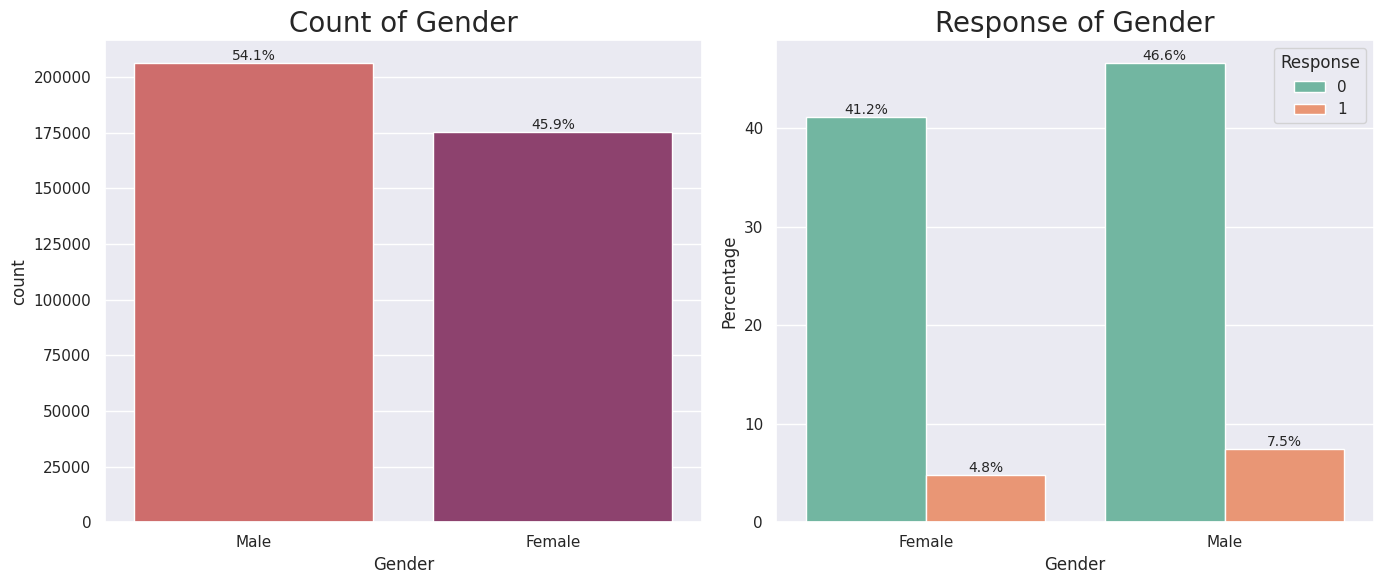

In [14]:
univariate_analyzer.execute_analysis(df_train, feature='Gender', is_categorical=True, group_by="Response")

**Gender Distribution**:  
   - The `gender` variable is nearly evenly distributed.  
   - The **male** category has a slightly higher representation compared to the **female** category.  
   - Males are also marginally more likely to purchase vehicle insurance.

**Response Rate Distribution**:  
   - A significant majority of individuals are **not interested** in purchasing vehicle insurance.  
   - The response rate for those **not interested** is much higher than those who are interested.

**Percentage of Interested Buyers**:  
   - Only **12.3%** of individuals are interested in buying vehicle insurance.  
   - The remaining **87.7%** are **not interested**.


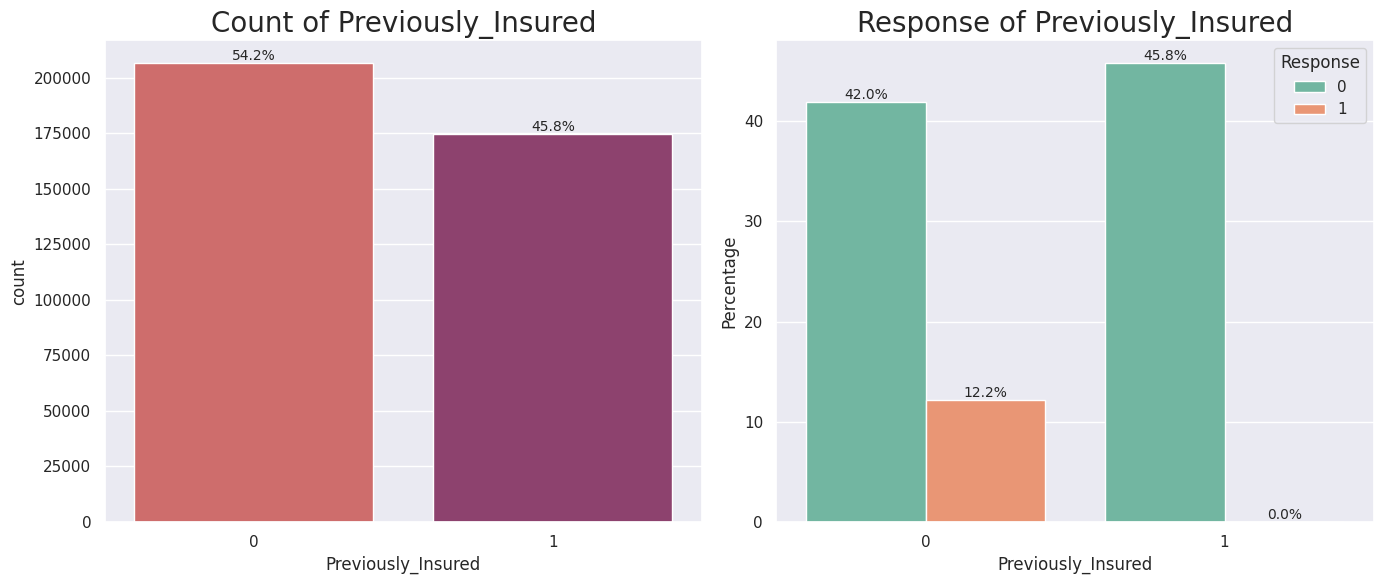

In [15]:
univariate_analyzer.execute_analysis(df_train, feature='Previously_Insured', is_categorical=True, group_by="Response")

**Percentage of Previously Insured Customers**:  
   - The graph shows that **45.8%** of the customers have been insured previously. 
   - Among previously insured customers, **12.2%** are interested in buying vehicle insurance again.  
   - This suggests that these customers are aware of the advantages of insurance policies and are prepared to pay a premium amount to mitigate risks. 

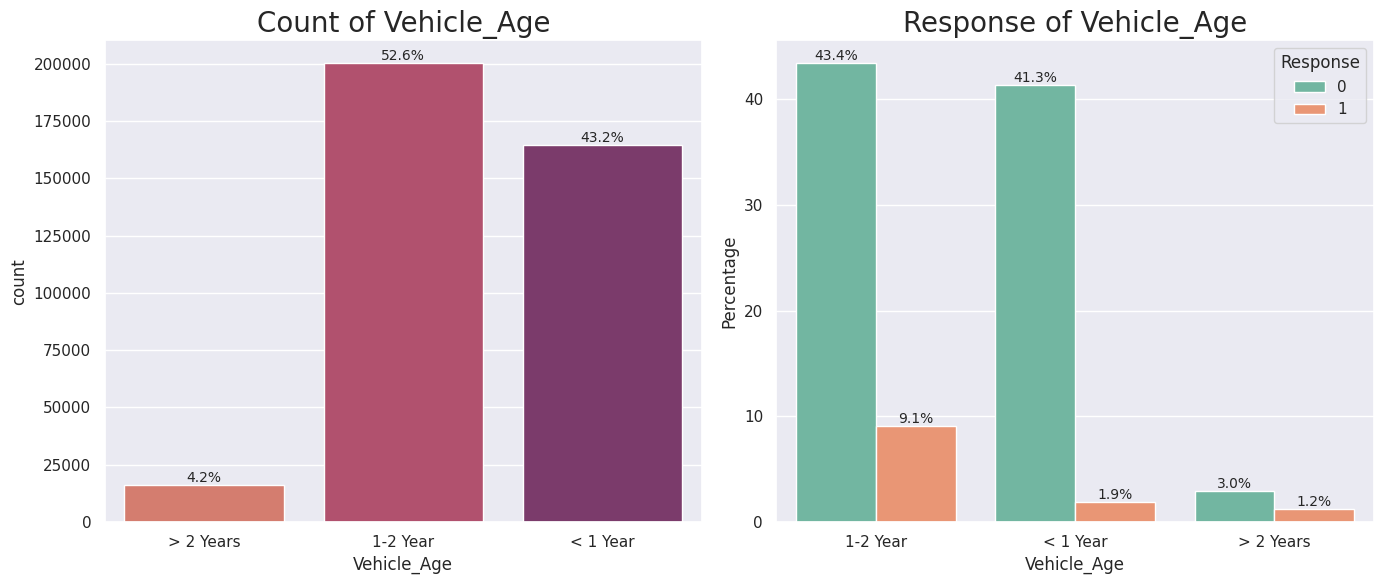

In [16]:
univariate_analyzer.execute_analysis(df_train, feature='Vehicle_Age', is_categorical=True, group_by="Response")

**Distribution of Vehicle Age**:  
   - **4.2%** of vehicles are older than two years.  
   - **52.6%** of vehicles are between one and two years old.  
   - **43.2%** of vehicles are less than one year old.

**Interest in Purchasing Insurance by Vehicle Age**:  
   - **1.2%** of customers are interested in purchasing vehicle insurance for vehicles older than two years.  
   - **9.1%** are interested in purchasing insurance for vehicles between one and two years old.  
   - **1.9%** are interested in purchasing insurance for vehicles less than one year old.

**Key Observation**:  
   - As the age of the vehicle increases, the proportion of people interested in purchasing insurance also increases.  
   - This indicates greater awareness of the risks associated with older vehicles and a higher inclination to mitigate these risks through insurance.


##### **b) Numberical feature Analysis**

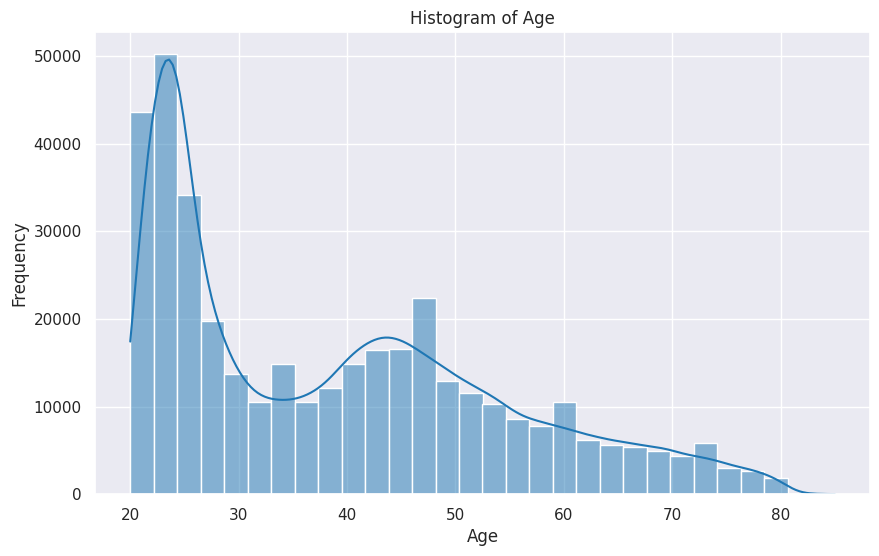

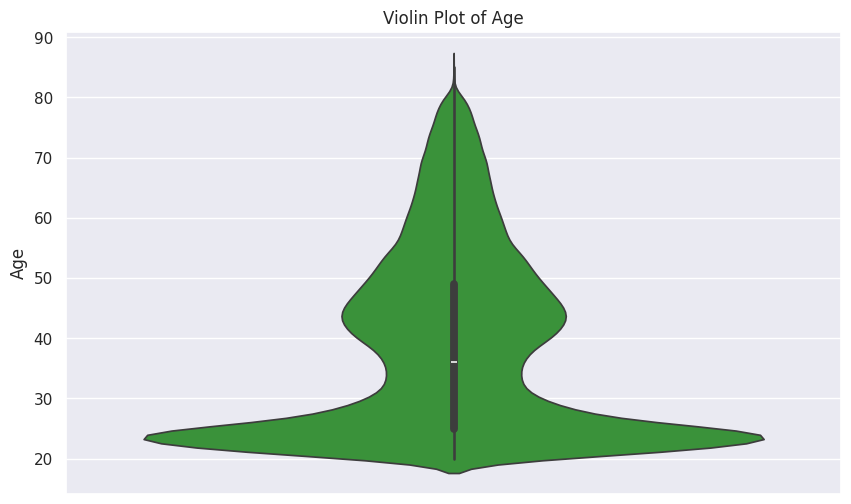

In [17]:
# Switch strategy to analyze the Numerical feature
univariate_analyzer.set_strategy(NumericalAnalysis())
univariate_analyzer.execute_analysis(df_train, feature='Age', is_categorical=False)

<Axes: xlabel='Age', ylabel='count'>

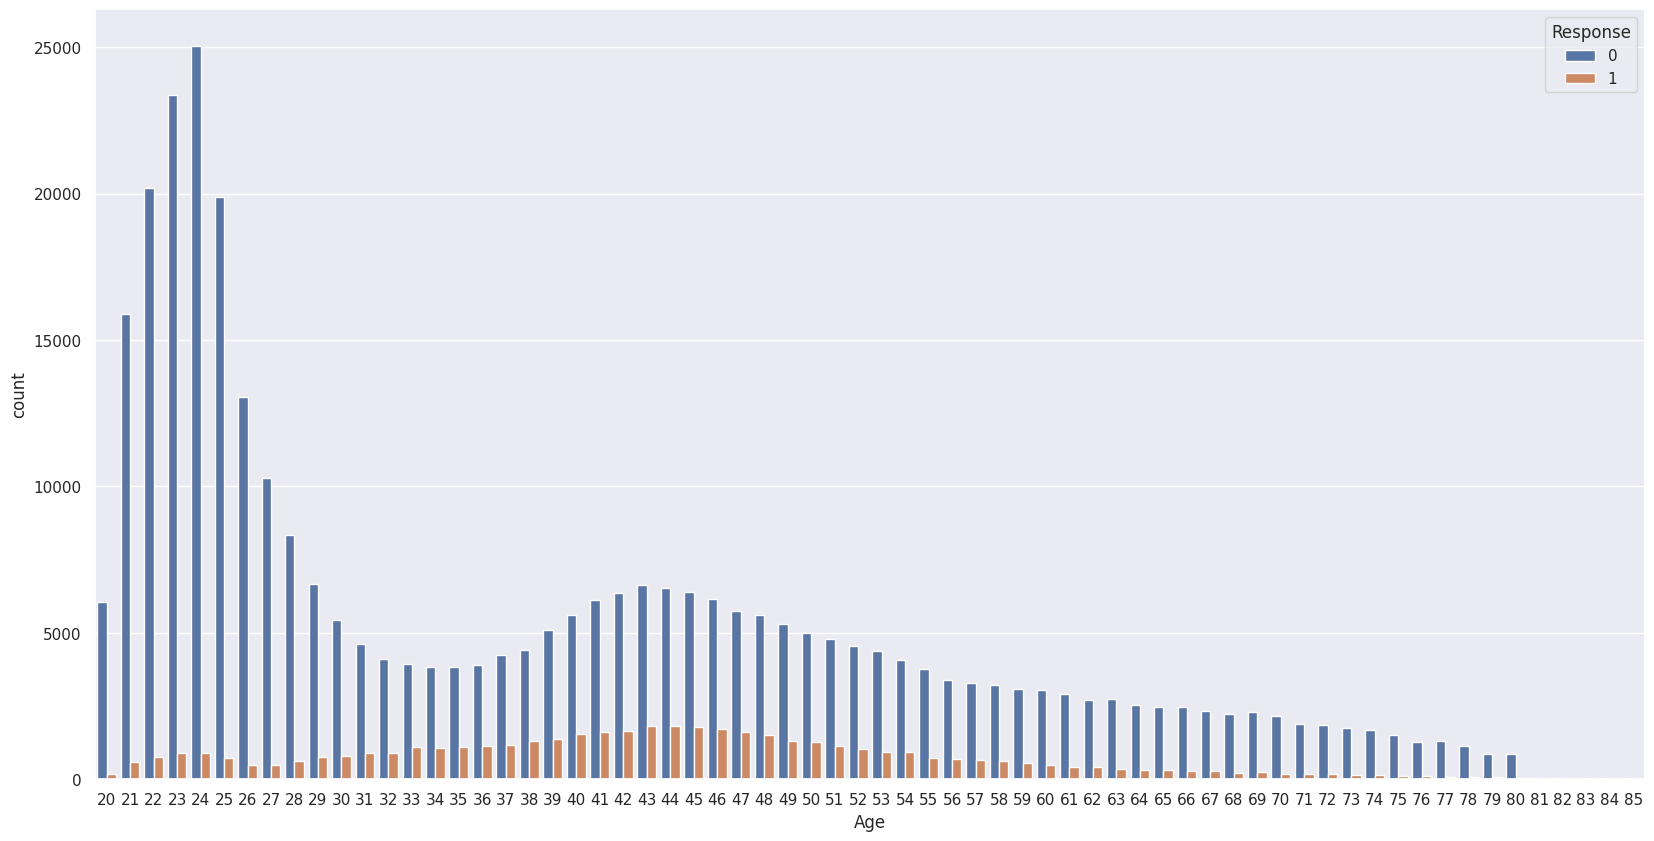

In [18]:
# Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df_train)

- The dataset shows that the majority of individuals are aged **24 years**. This suggests that 24-year-olds represent a significant portion of the customer base.
  
- **Middle-aged individuals (ages 40 to 60)** have a **higher likelihood** of purchasing vehicle insurance compared to other age groups. This could be due to greater **financial stability** and a stronger sense of responsibility towards safeguarding assets.

- **Target Audience for Insurance**: 
  - **Middle-aged individuals** are likely to be more interested in vehicle insurance due to their **financial stability** and readiness to make long-term investments.
  - **Teenagers**, who are already familiar with insurance policies, might be an **untapped demographic** that insurance companies could explore further.
  
  Therefore, **middle-aged individuals** and **teenagers** could be key target audiences for insurance companies.


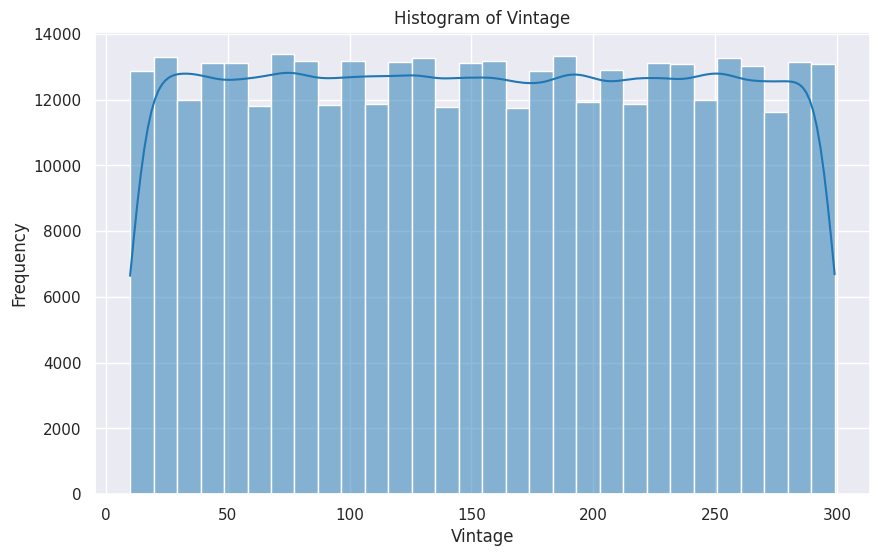

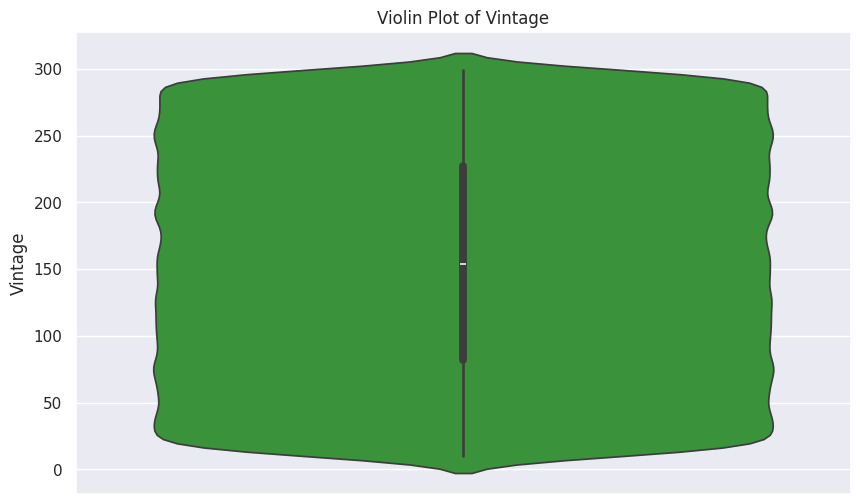

In [19]:
univariate_analyzer.execute_analysis(df_train, feature='Vintage', is_categorical=False)

- From the distribution plot of the **Vintage** variable, we can observe that it has an **almost uniform distribution**.
- This suggests that customers are spread relatively evenly across the range of the **Vintage** variable.
- The dataset does not have a heavy concentration of customers from any specific period.
- A **uniform distribution** might indicate that the vehicle insurance company is catering to a **diverse customer base** in terms of how long they've been a customer or how long they've been insured. 

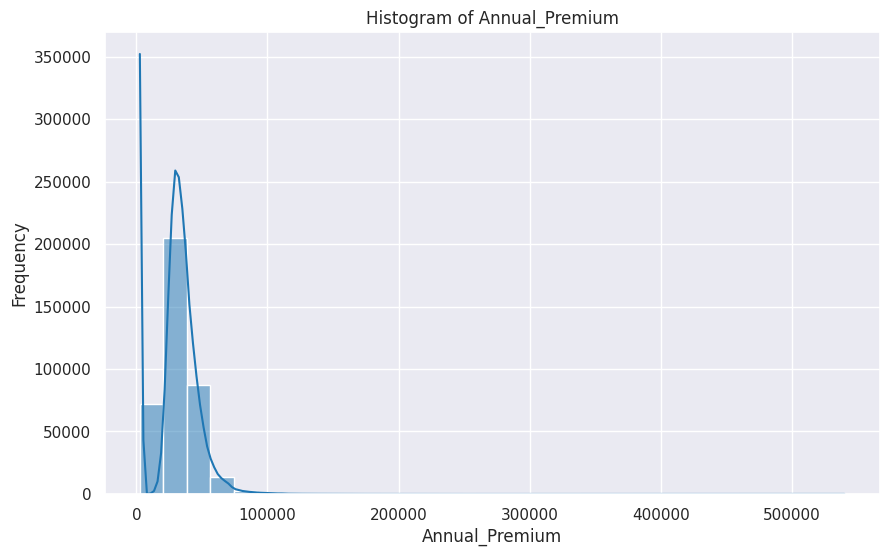

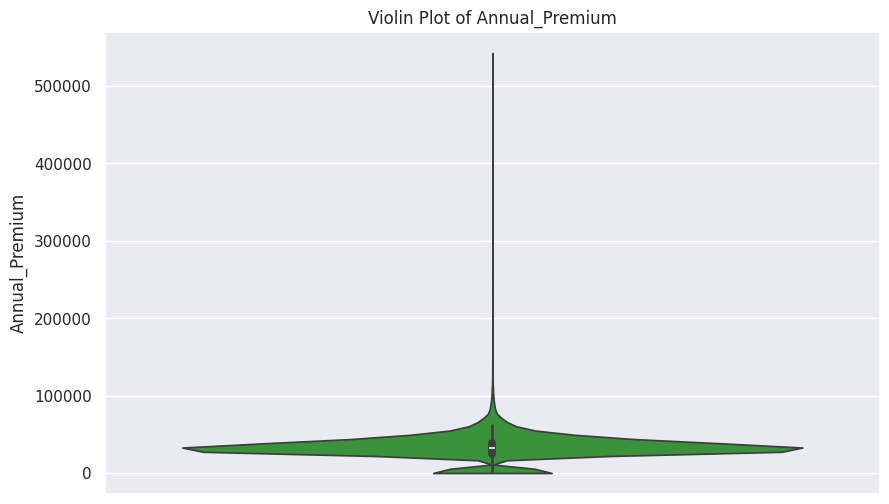

In [20]:
univariate_analyzer.execute_analysis(df_train, feature='Annual_Premium', is_categorical=False)

- The plots reveal that the **Annual Premium** variable is **right-skewed**. This indicates that:
  
  



#### 2. **Bivariate Analysis**

##### **a) Categorical Vs Numerical Analysis**

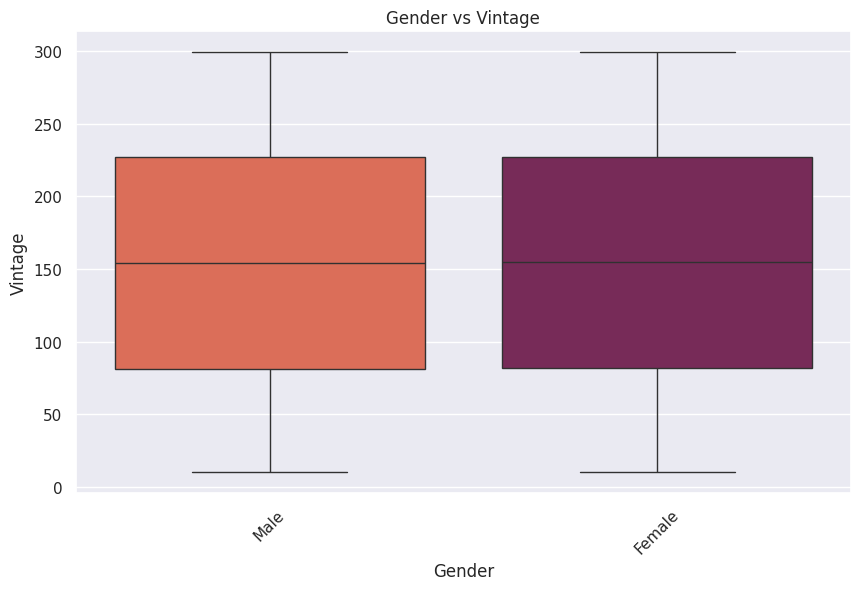

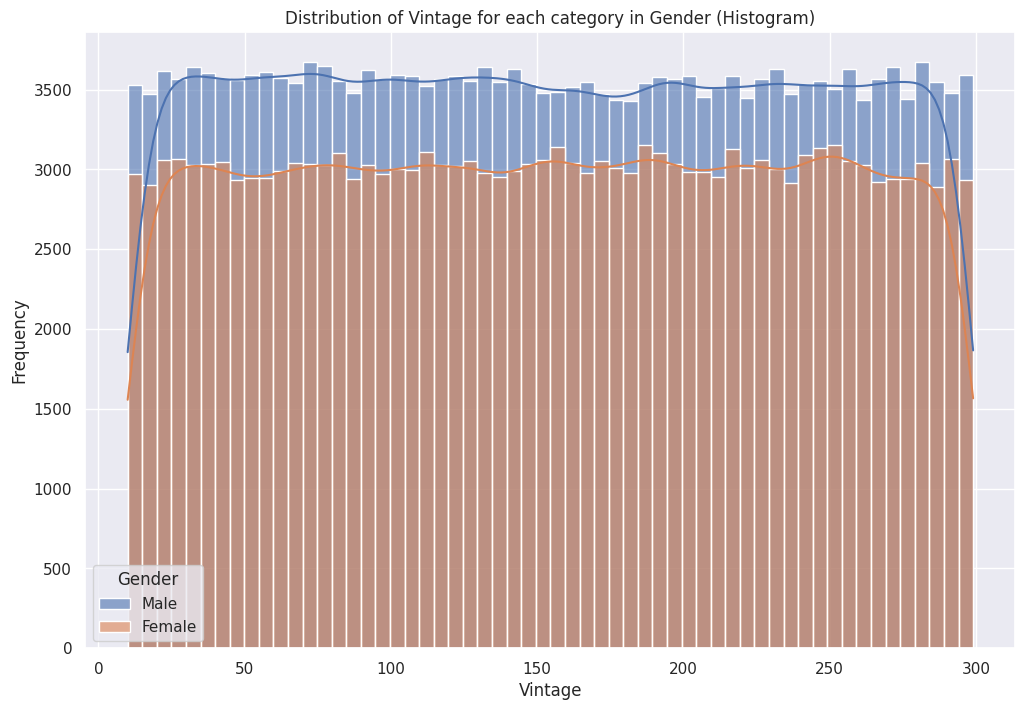

In [33]:
from analyze_src.bivariate_analysis import BivariateAnalyzer,CategoricalVsNumericalAnalysis,CategoricalVsTargetAnalysis, NumericalVsTargetAnalysis,NumericalVsNumericalAnalysis

# Analyzing the Relationship Between Categorical and  Numerical Features
bivariate_analyzer = BivariateAnalyzer(CategoricalVsNumericalAnalysis())

bivariate_analyzer.execute_analysis(df_train,'Gender','Vintage')

- **No Outliers**: There are **no outliers** observed in the comparison between **Gender and Vintage**. The data appears to be consistent without any extreme values that would skew the analysis.

- **Uniform Distribution of Vintage**: The **Vintage** variable shows a **uniform distribution**, indicating that the dataset does not favor any specific range of values, and the data is spread evenly across the categories.

- **Gender Distribution**: From the analysis, we can observe that **males** are in the majority when it comes to the **Vintage** category, indicating that more male customers are present in the dataset across different vintage values. 

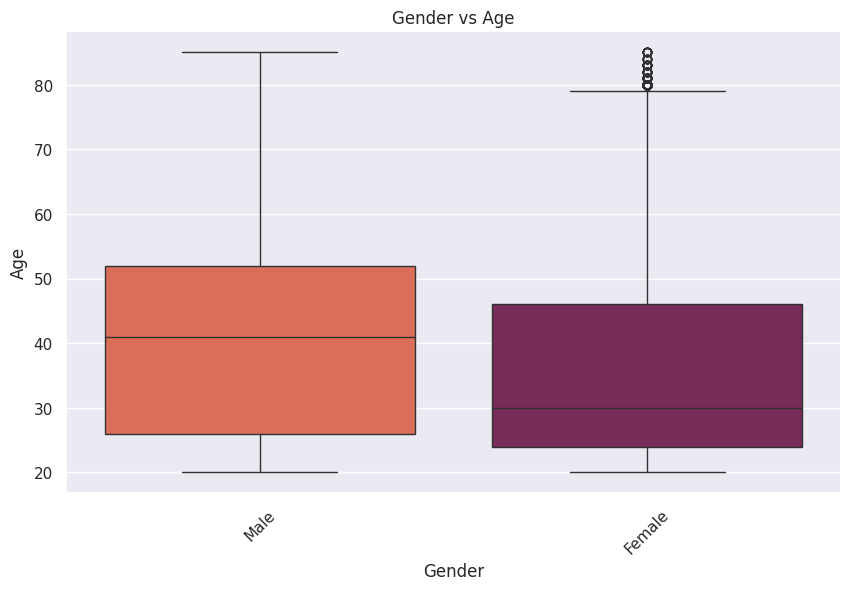

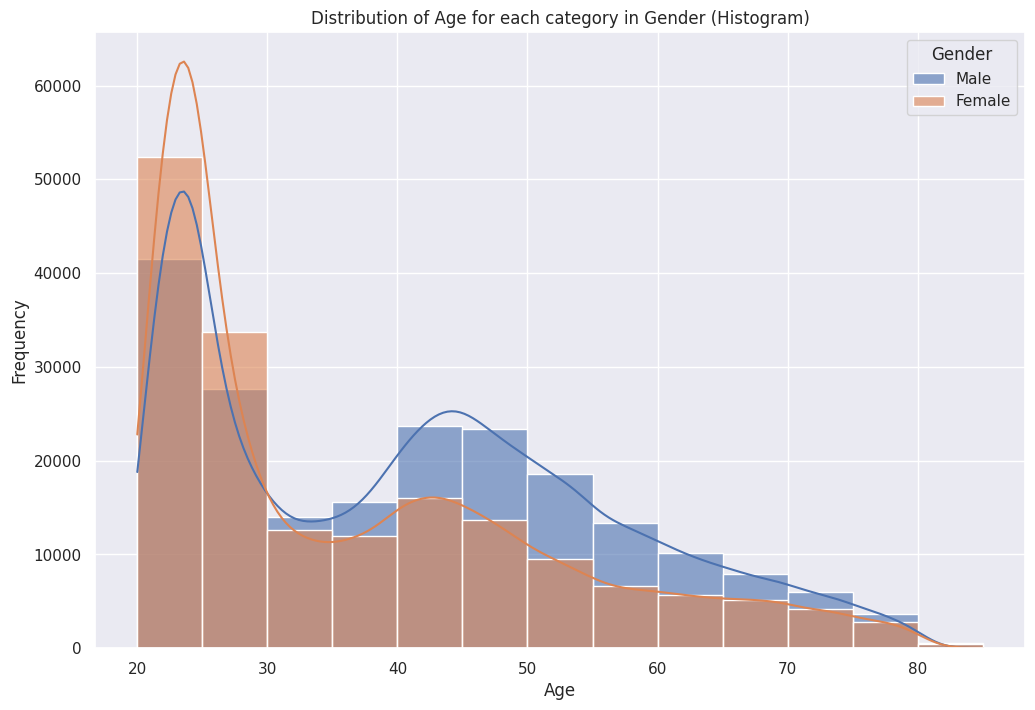

In [34]:
bivariate_analyzer.execute_analysis(df_train,'Gender','Age')

- **Outliers in Female Box Plot**: In the box plot comparing **Gender and Age**, there are a few **outliers** in the female category. These outliers indicate that there are some females with ages significantly higher than the rest of the dataset.

- **Positive Skew in Age Distribution**: The distribution of **Age** across both genders is **positively skewed**, meaning the majority of the data points are clustered around the lower age values, with fewer individuals in the older age ranges.

- The analysis shows that **males** make up the **majority** in the younger age categories (around 20-30 years old), while **females** are more prominent in the older age categories (around 30-80 years old).


##### **b) Numerical Vs Numerical Analysis**

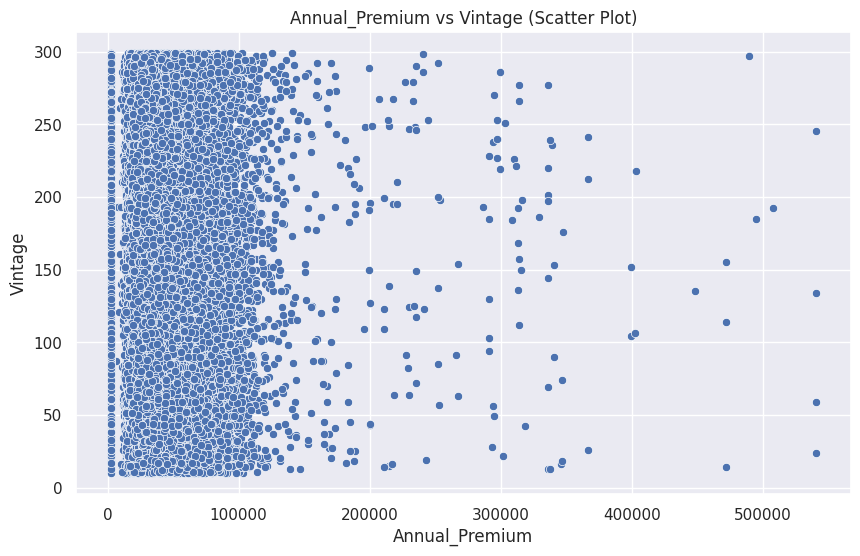

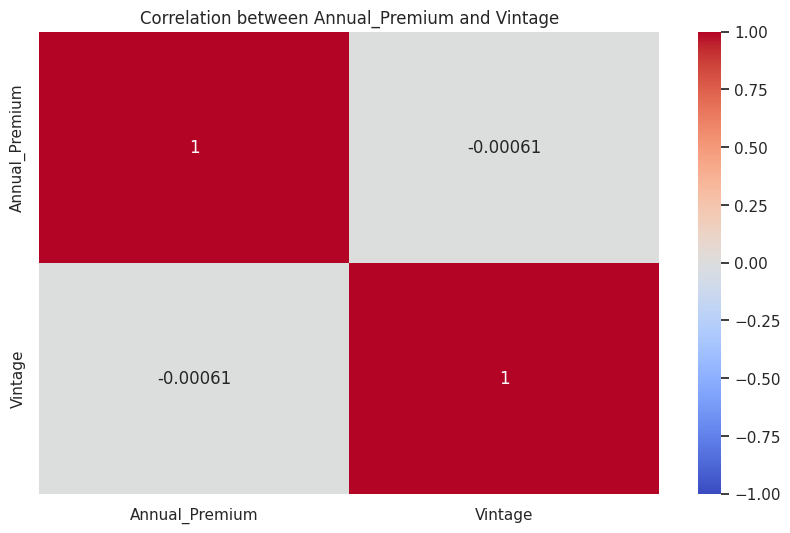

In [ ]:
# Switch strategy to analyze the Relationship Between Two Numerical Features
bivariate_analyzer.set_strategy(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df_train,'Annual_Premium','Vintage')

- In the scatter plot, we observe that the majority of the data points are concentrated in the **0 to 100,000** range for annual premiums. There are very few points scattered beyond this range, indicating that most customers in the dataset pay an annual premium within this range.

- The correlation between **Annual Premium** and **Vintage** is **-0.00061**, which suggests a **very weak negative relationship** between the two variables. This means that changes in **Vintage** (the number of years a customer has been with the company) have **minimal impact** on the **Annual Premium** paid by customers. The weak negative correlation indicates that as **Vintage** increases, there is almost no significant change in the **Annual Premium**.


#### 3. **Multivariate Analysis** 

In [22]:
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis
numerical_cols = df_train.select_dtypes(exclude="object") 
 
# Initialize the Multivariate Analyzer with SimpleMultivariateAnalysis 
multivariate_analyzer = SimpleMultivariateAnalysis()

##### **a) Correlation Analysis**

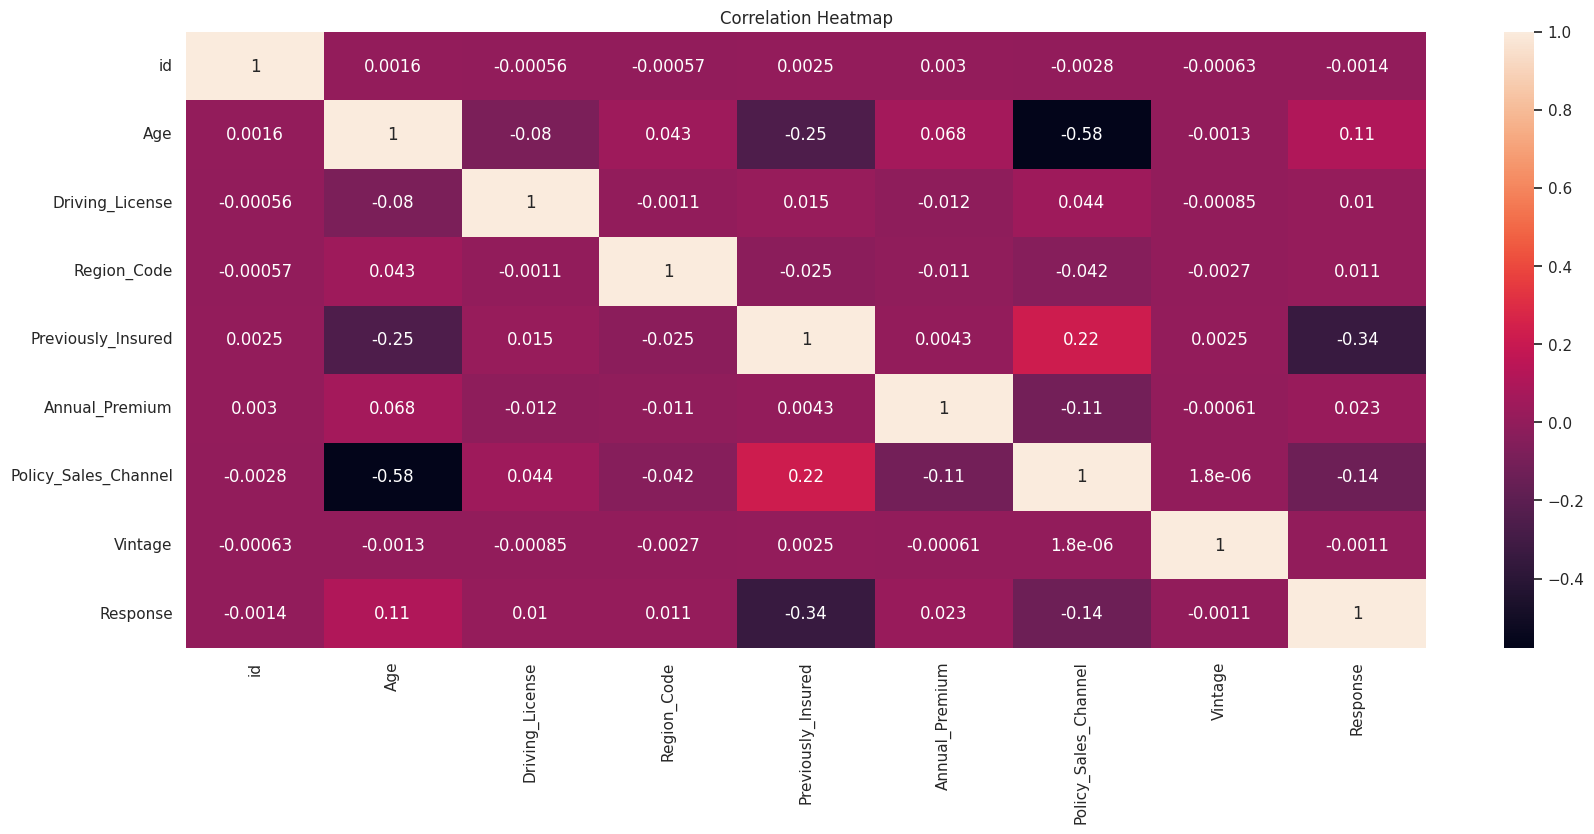

In [23]:
multivariate_analyzer.generate_correlation_heatmap(numerical_cols)

- **`Previously_Insured` vs. `Response`**: Strong negative correlation (~ -0.34) indicates previously insured individuals are less likely to respond.
- **`Policy_Sales_Channel` vs. `Age`**: Moderate negative correlation (~ -0.58), suggesting younger individuals may prefer different sales channels.
- **`Age` vs. `Response`**: Weak positive correlation (~ 0.11), showing older individuals might respond slightly more.
- **Low Correlations**: Most other variables have weak or negligible correlations with `Response`.
- **Actionable Insights**:
  - Focus on `Previously_Insured`, `Policy_Sales_Channel`, and `Age` as key predictors. 


##### **b) Pairplot**

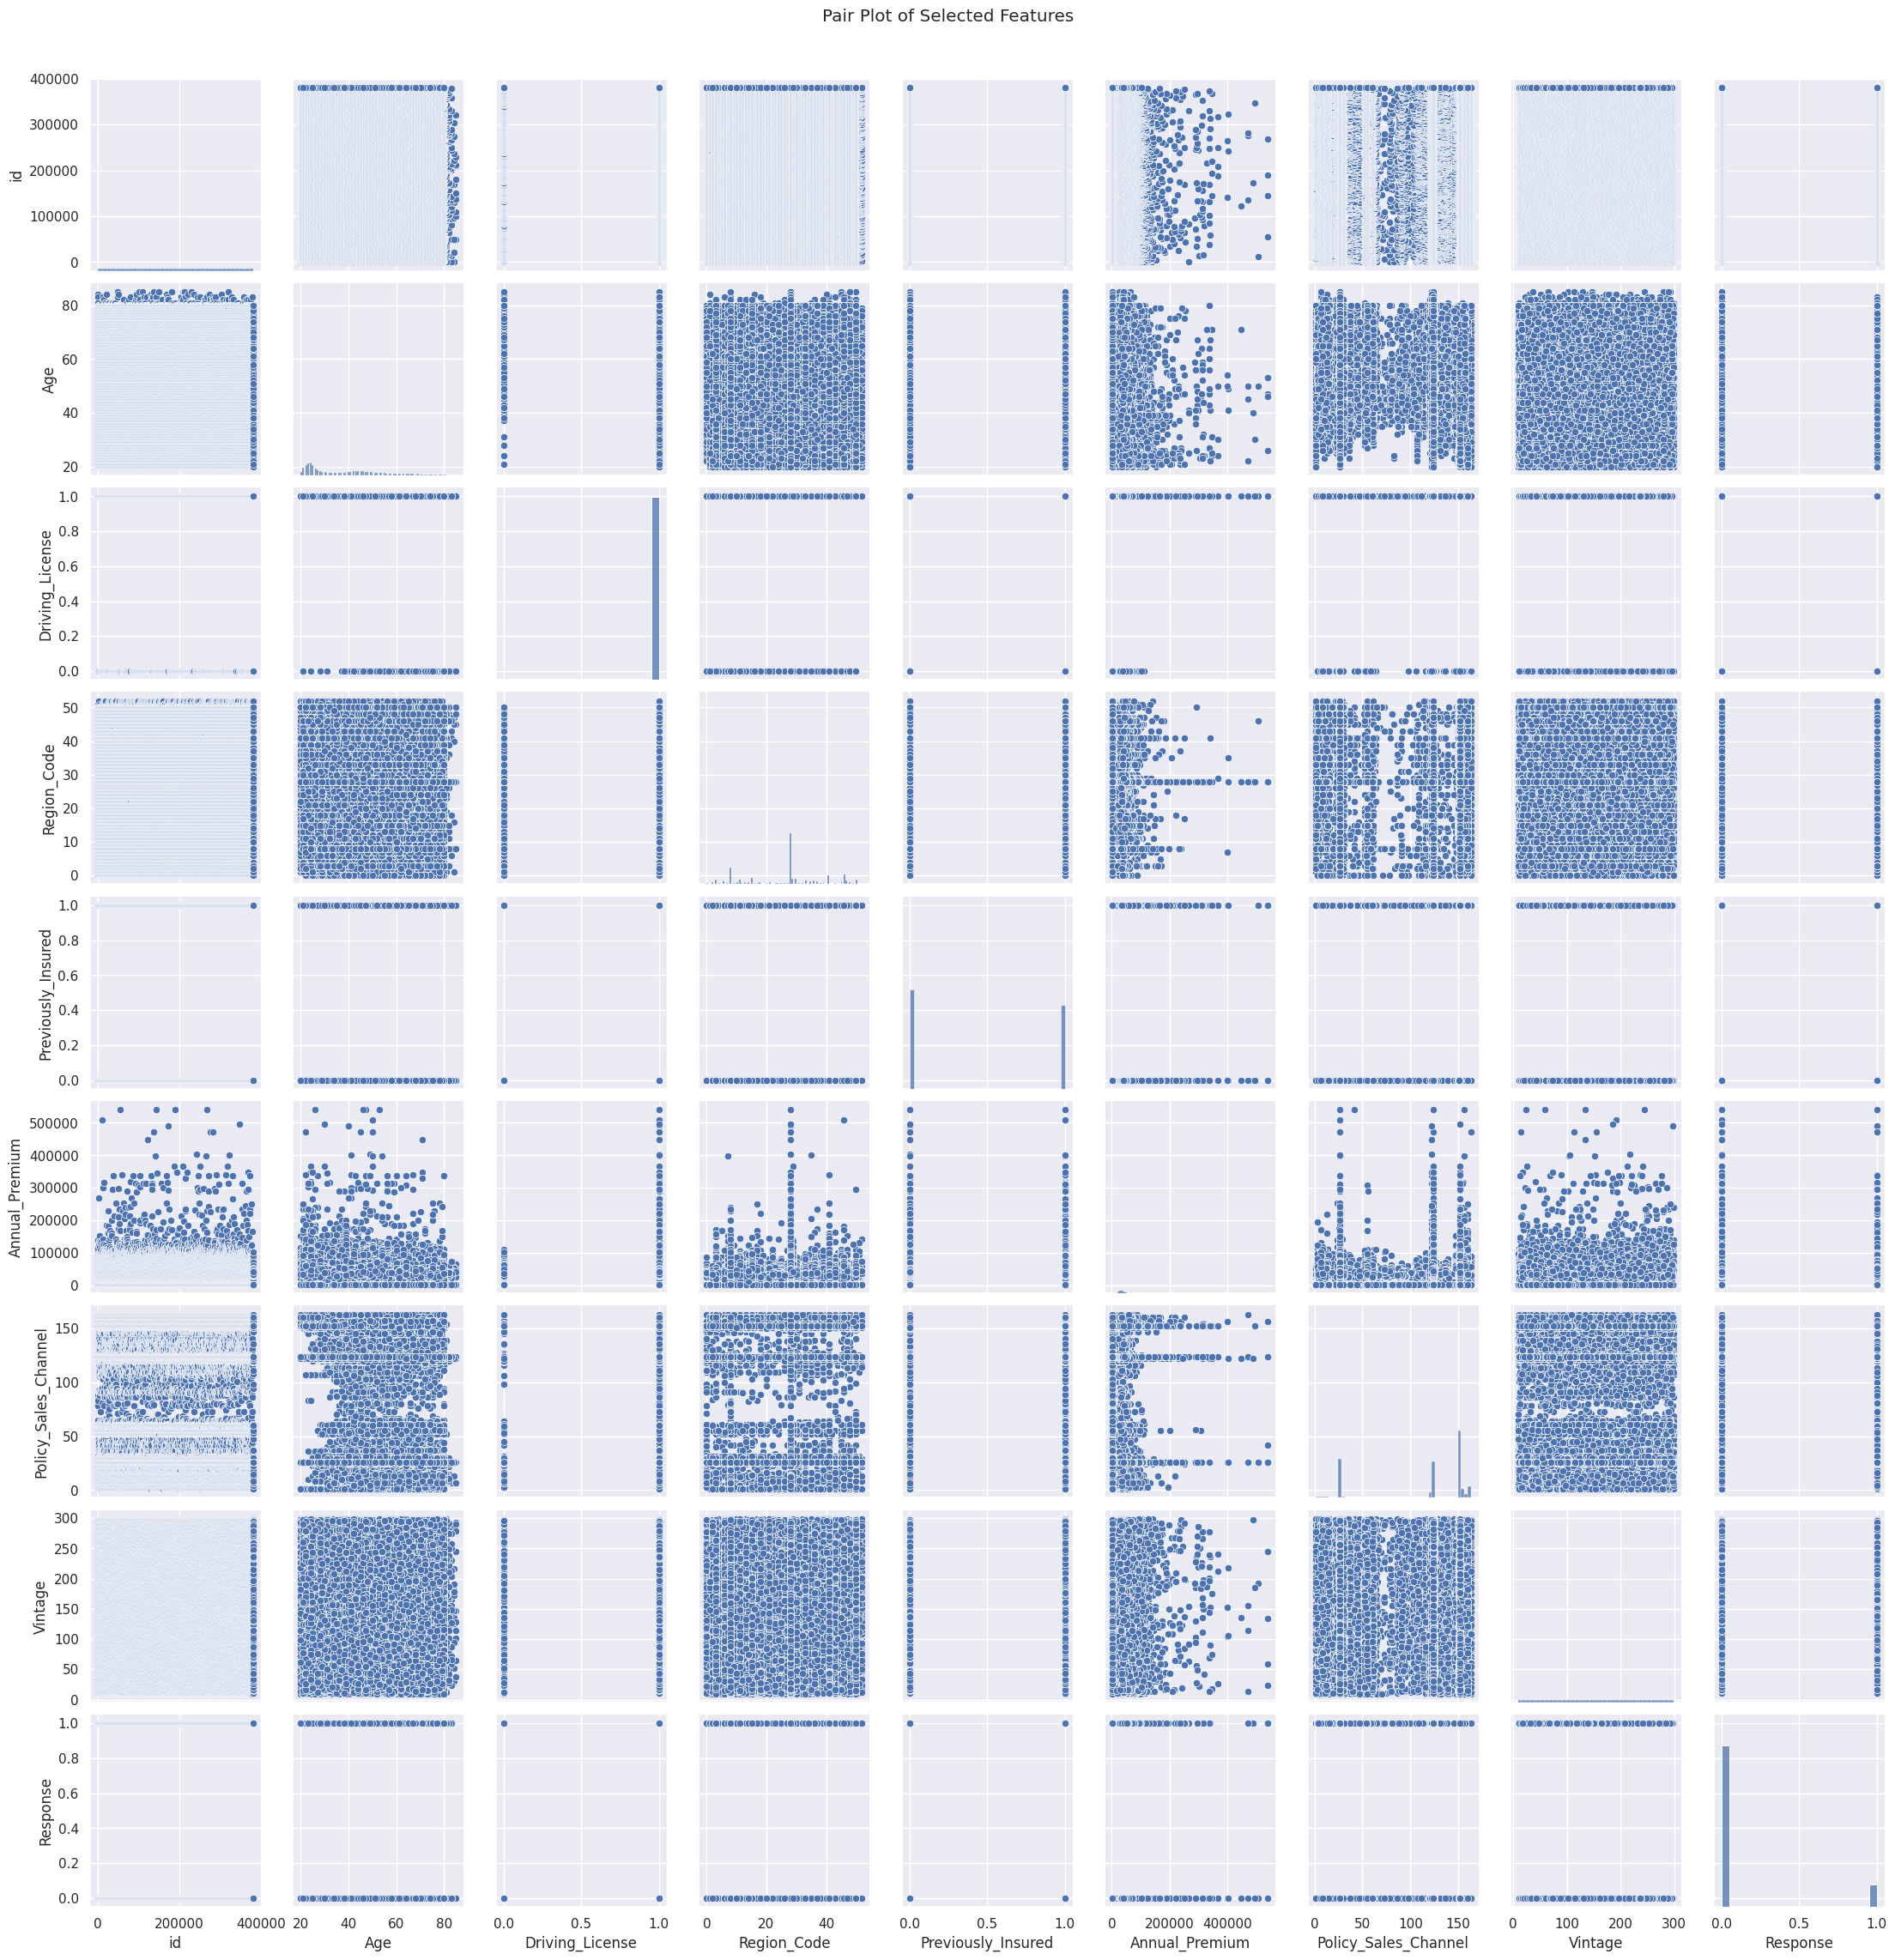

In [24]:
multivariate_analyzer.generate_pairplot(df_train) 

##### **C) Outlier Visualisation - Boxplot**

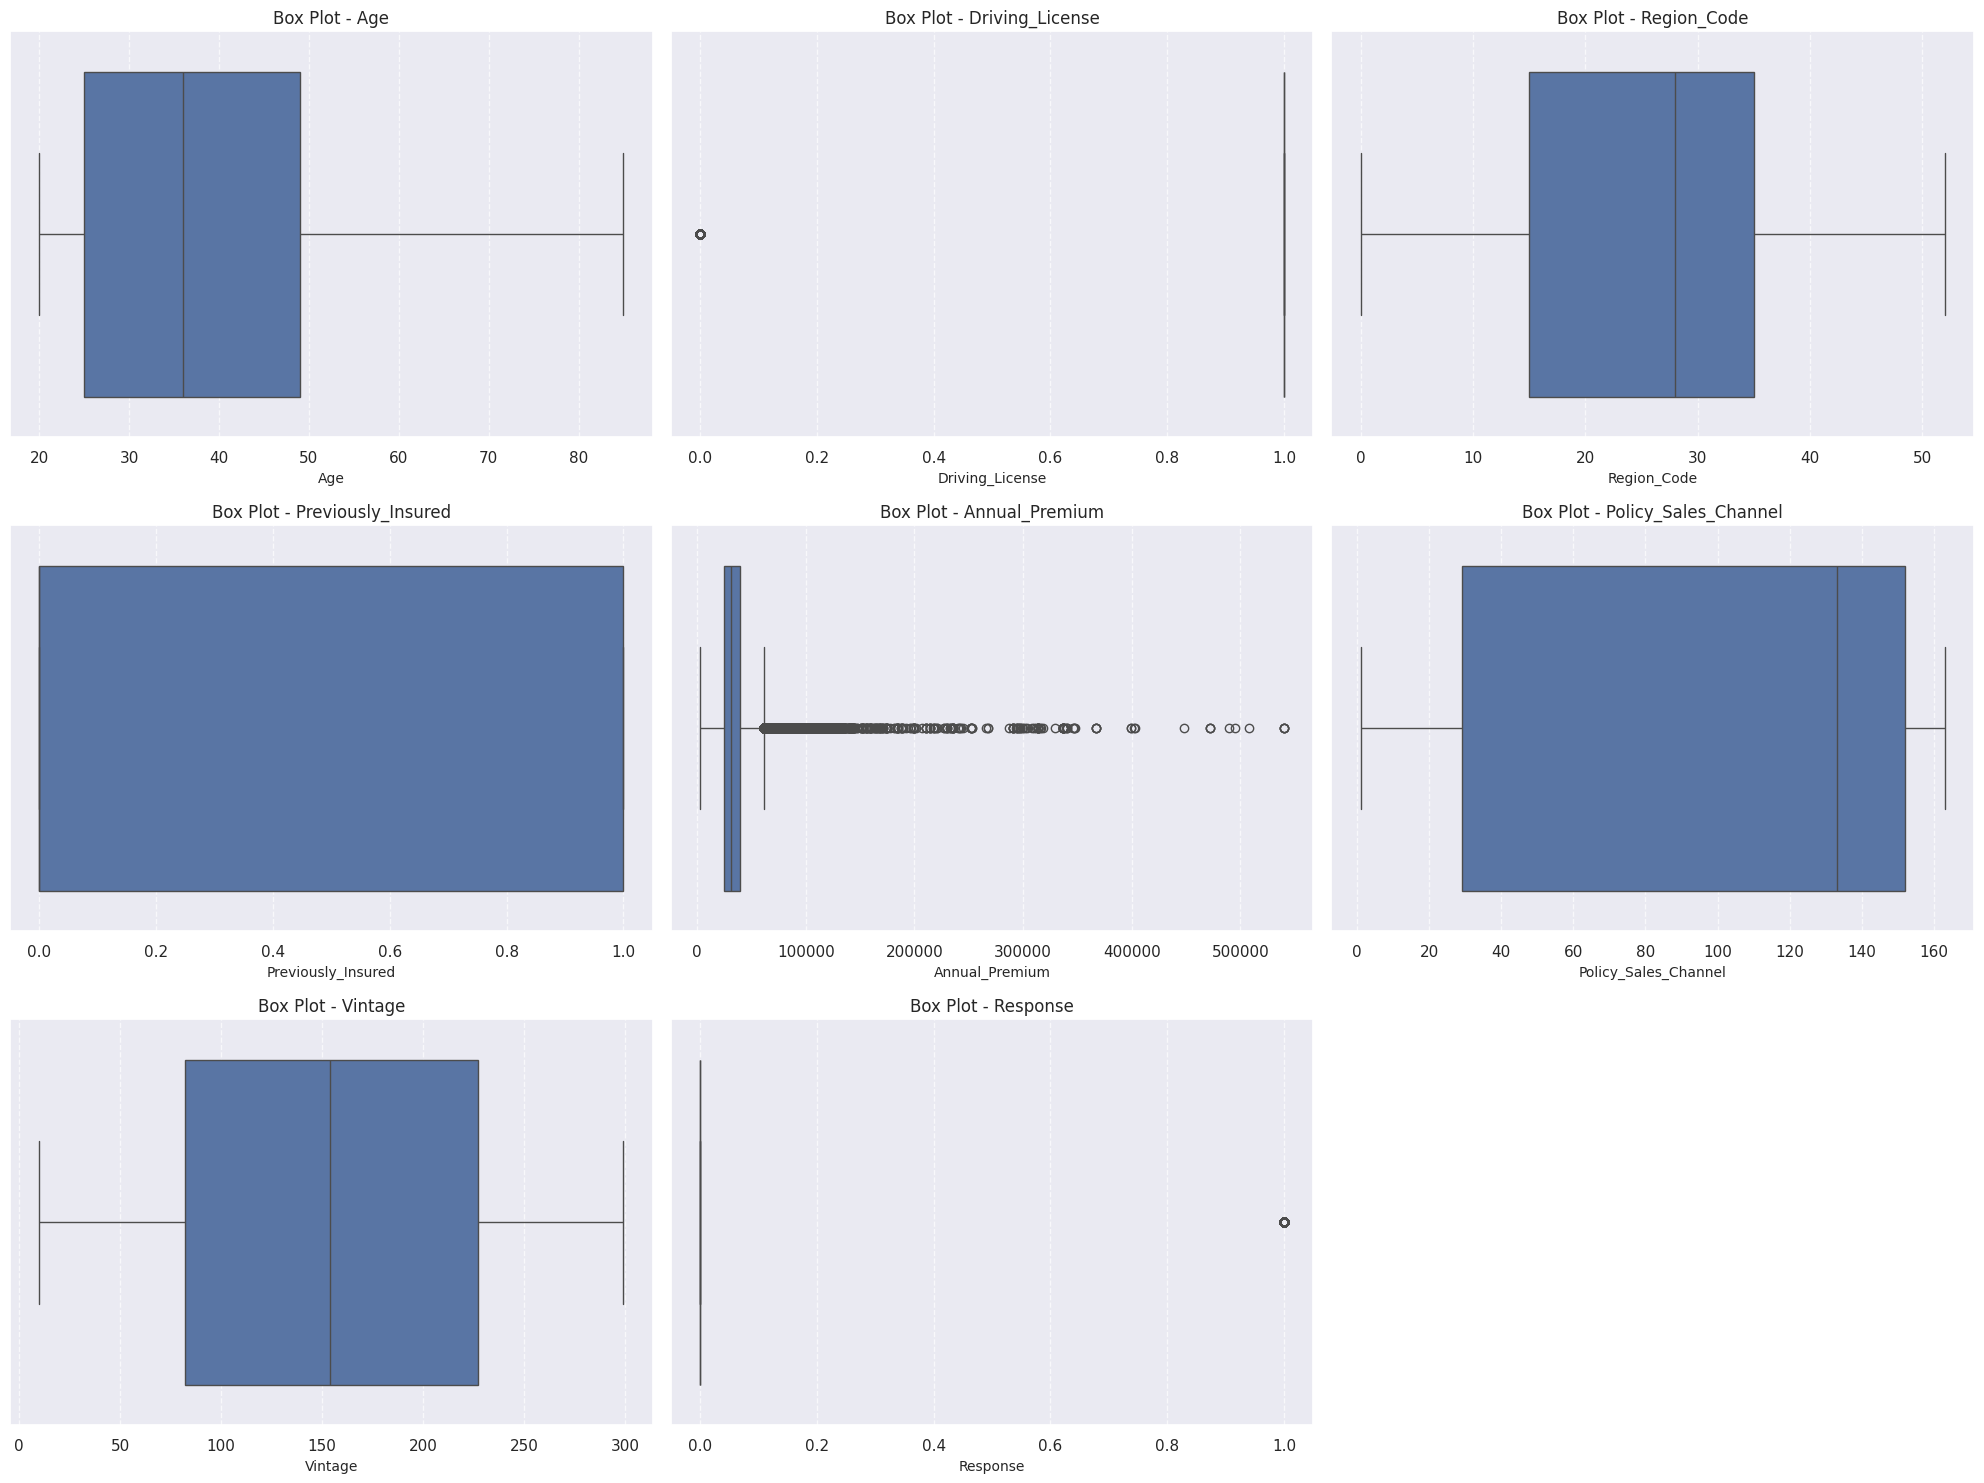

In [25]:
multivariate_analyzer.check_outliers_with_boxplot(numerical_cols)


- **Outliers in Annual_Premium**: Upon examining the dataset, we observe that **Annual_Premium** is the only column with outliers. The distribution of **Annual_Premium** shows significant variation, with some data points being much higher than the majority, indicating the presence of outliers. These extreme values may require further investigation or handling, depending on the analysis or model being built.

- **Other Columns**: For all other columns in the dataset, no outliers are detected. The values in these columns follow expected ranges, and the distribution appears to be more uniform or within a reasonable spread without extreme deviations.


##### **d) Line Plot**

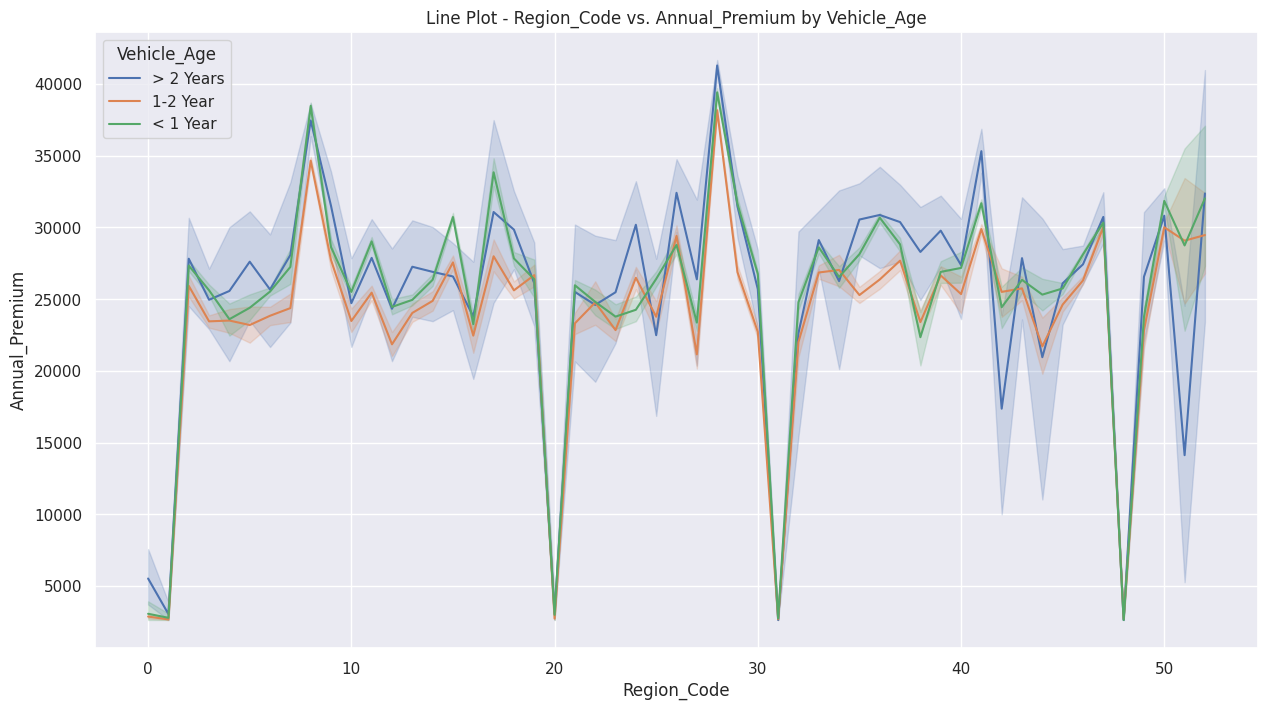

In [26]:
multivariate_analyzer.visualize_lineplot(df_train, x='Region_Code',y='Annual_Premium',hue ='Vehicle_Age')

- Significant variations in `Annual remium` across `Region Code`, with region-specific peaks and dips.
- Older vehicles (>2 years) generally have higher premiums, while newer vehicles show overlapping trends.
- Variations in premiums by `Vehicle Age` are consistent across most regions, except for extreme deviations (e.g., Regions 0 and 30).
- `Region Code` and `Vehicle Age` are important for segmentation and pricing.
- We need to investigate regions with extreme premium fluctuations.


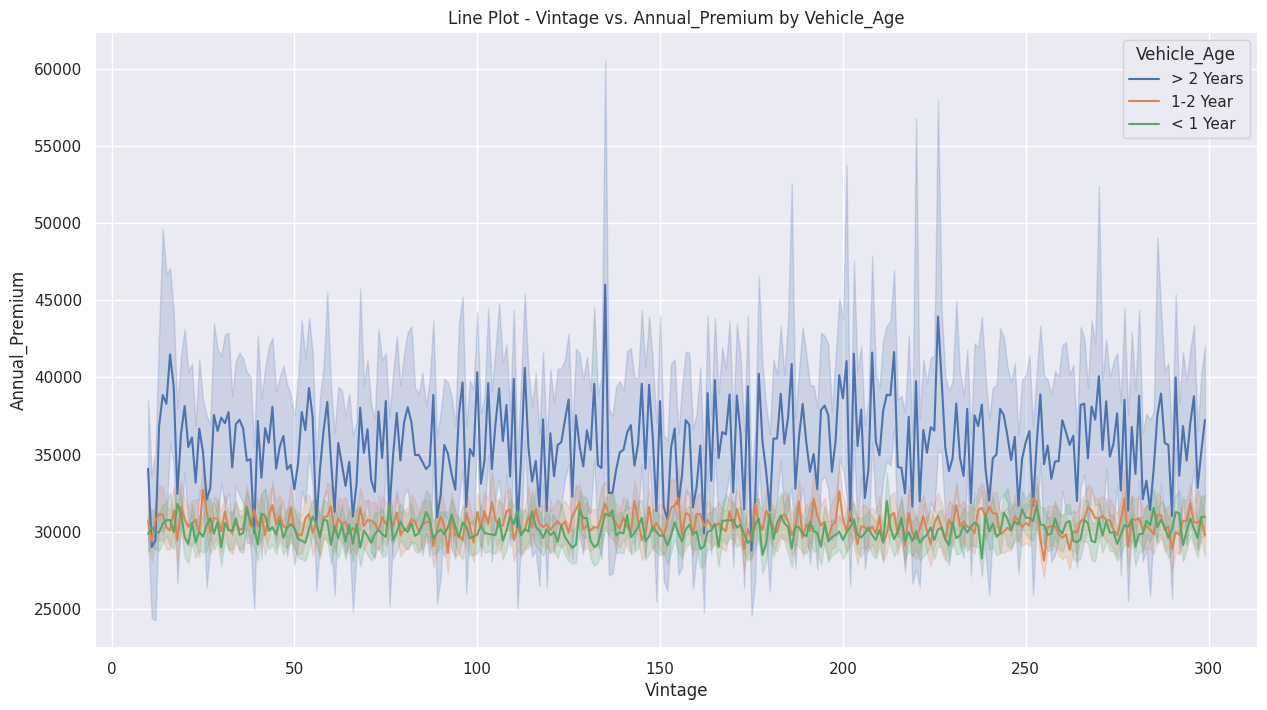

In [27]:
multivariate_analyzer.visualize_lineplot(df_train, x='Vintage',y='Annual_Premium',hue ='Vehicle_Age')

- Customers with vehicles aged **> 2 Years** tend to have significantly higher and more variable annual premiums.
- Vehicles aged **< 1 Year** consistently have the lowest annual premiums.
- Premiums for **1-2 Years** and **< 1 Year** are relatively stable with minimal fluctuations over the vintage period.
- The **> 2 Years** group shows sharp peaks and higher variability.
- The **> 2 Years** group has the widest spread (confidence intervals), suggesting more inconsistency in premiums compared to the other groups.

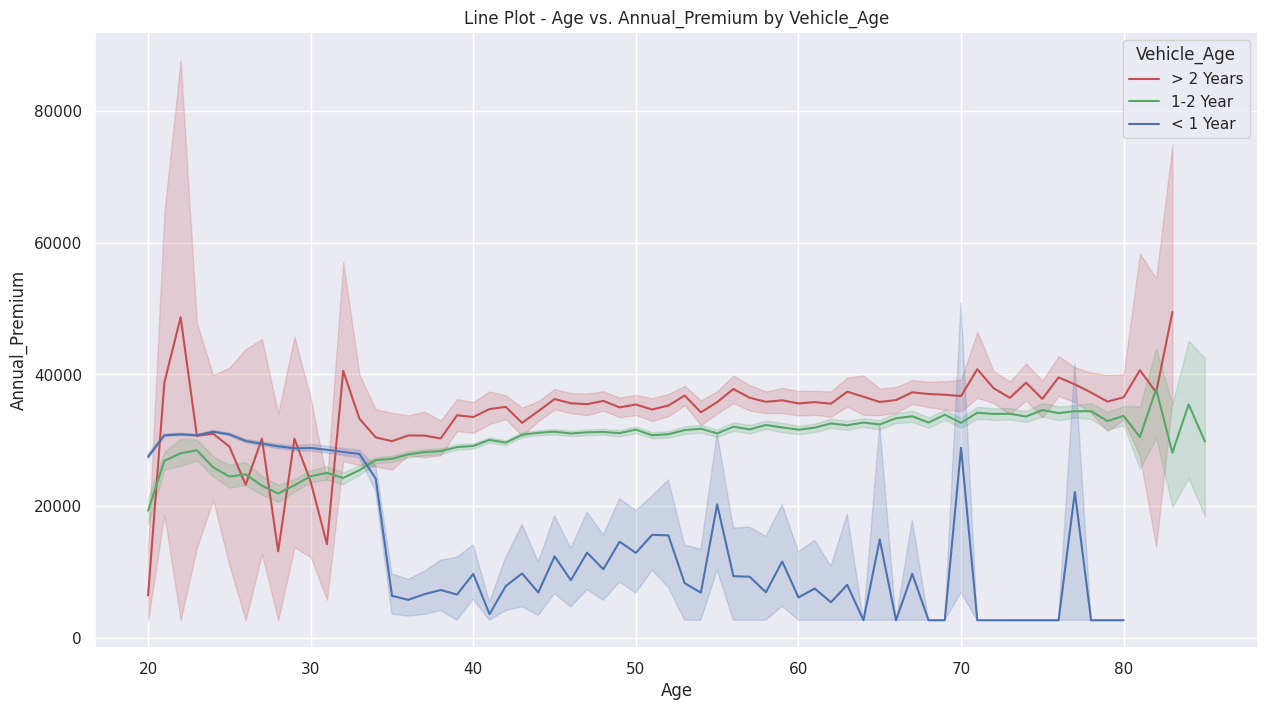

In [28]:
multivariate_analyzer.visualize_lineplot(df_train,x ='Age', y='Annual_Premium', hue='Vehicle_Age', palette=['r', 'g', 'b'])

- Younger customers (ages 20–30) show high variability in annual premiums, particularly for vehicles **> 2 Years**.
- After age 30, premiums for all vehicle age groups stabilize, with **> 2 Years** consistently having the highest premiums, followed by **1-2 Years** and **< 1 Year**.
- Customers above age 70 exhibit increased premiums, especially for vehicles **> 2 Years**, suggesting potential risk factors.
- Vehicles **> 2 Years** old have a broader spread across all ages, indicating variability in pricing policies.
 


In [29]:
# Loading the data from the outlier_detection_step
outlier_treated_df = pd.read_csv("/home/karthikponna/kittu/Health Insurance Cross Sell Prediction Mlops Project/Health-Insurance-Cross-Sell-Prediction-Mlops/data/artifacts/outlier_treated_data.csv")
outlier_treated_df.head()

Gender  Region_Code  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
0       0           28                   0            2               1   
1       0            3                   0            1               0   
2       0           28                   0            2               1   
3       0           11                   1            0               0   
4       1           41                   1            0               0   

   Annual_Premium  Vintage  Response  Age_Encoded  \
0       10.607946      217         1            1   
1       10.420405      183         0            2   
2       10.553075       27         1            1   
3       10.261861      203         0            0   
4       10.221832       39         0            1   

   Policy_Sales_Channel_Encoded  
0                      0.209127  
1                      0.209127  
2                      0.209127  
3                      0.353663  
4                      0.353663

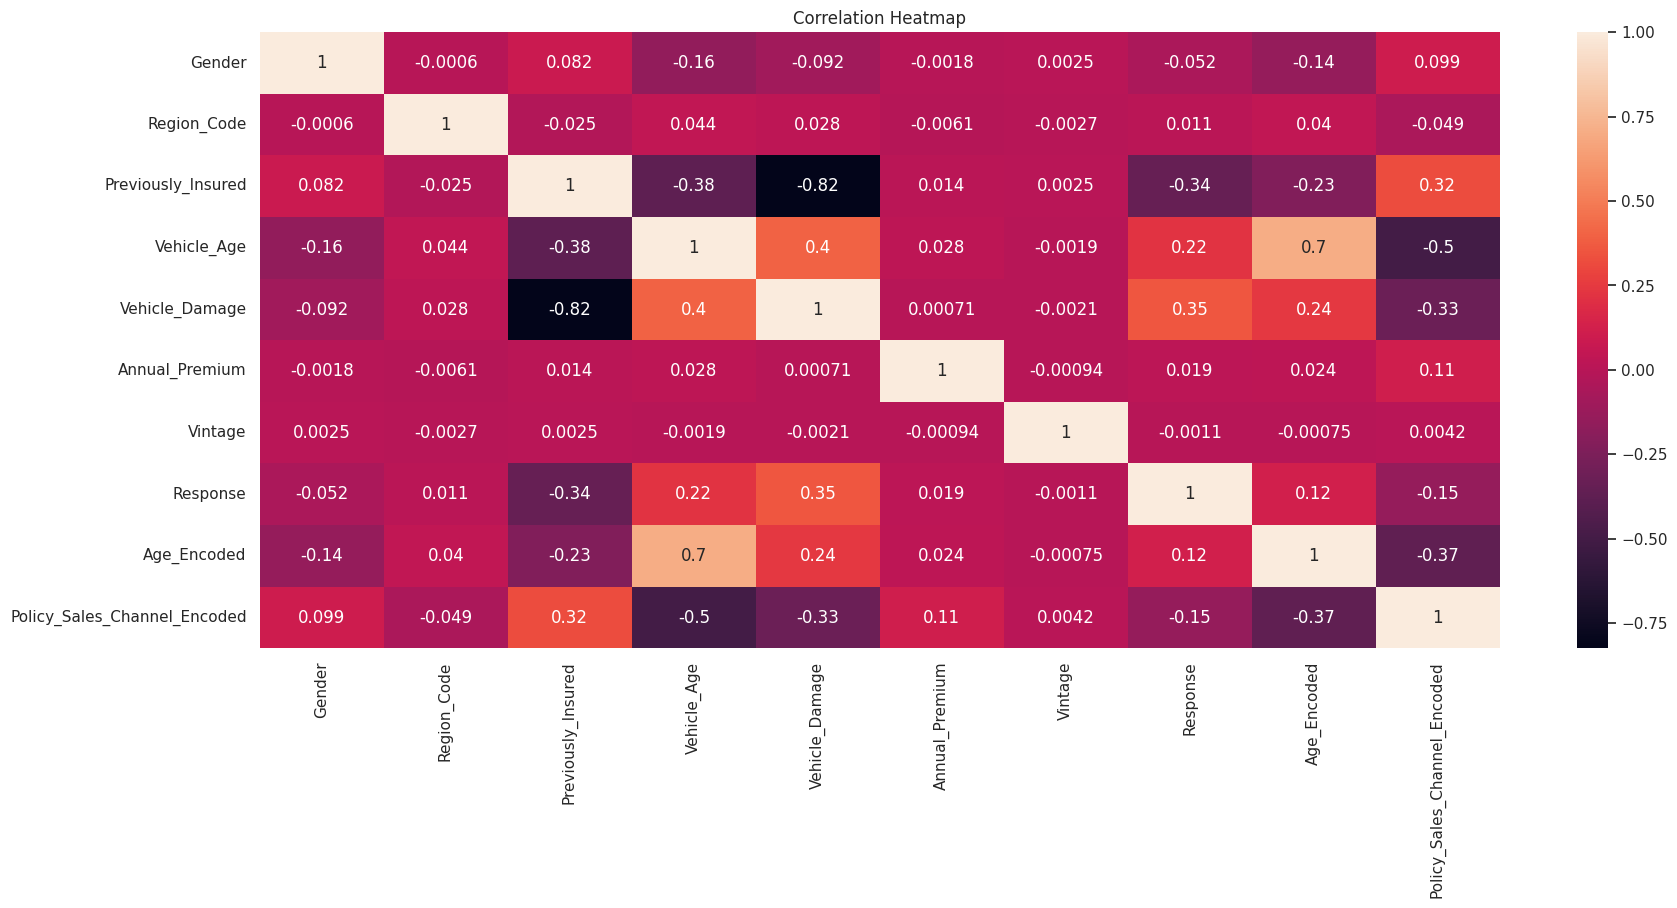

In [30]:
# Visualising Correlations
multivariate_analyzer.generate_correlation_heatmap(outlier_treated_df) 

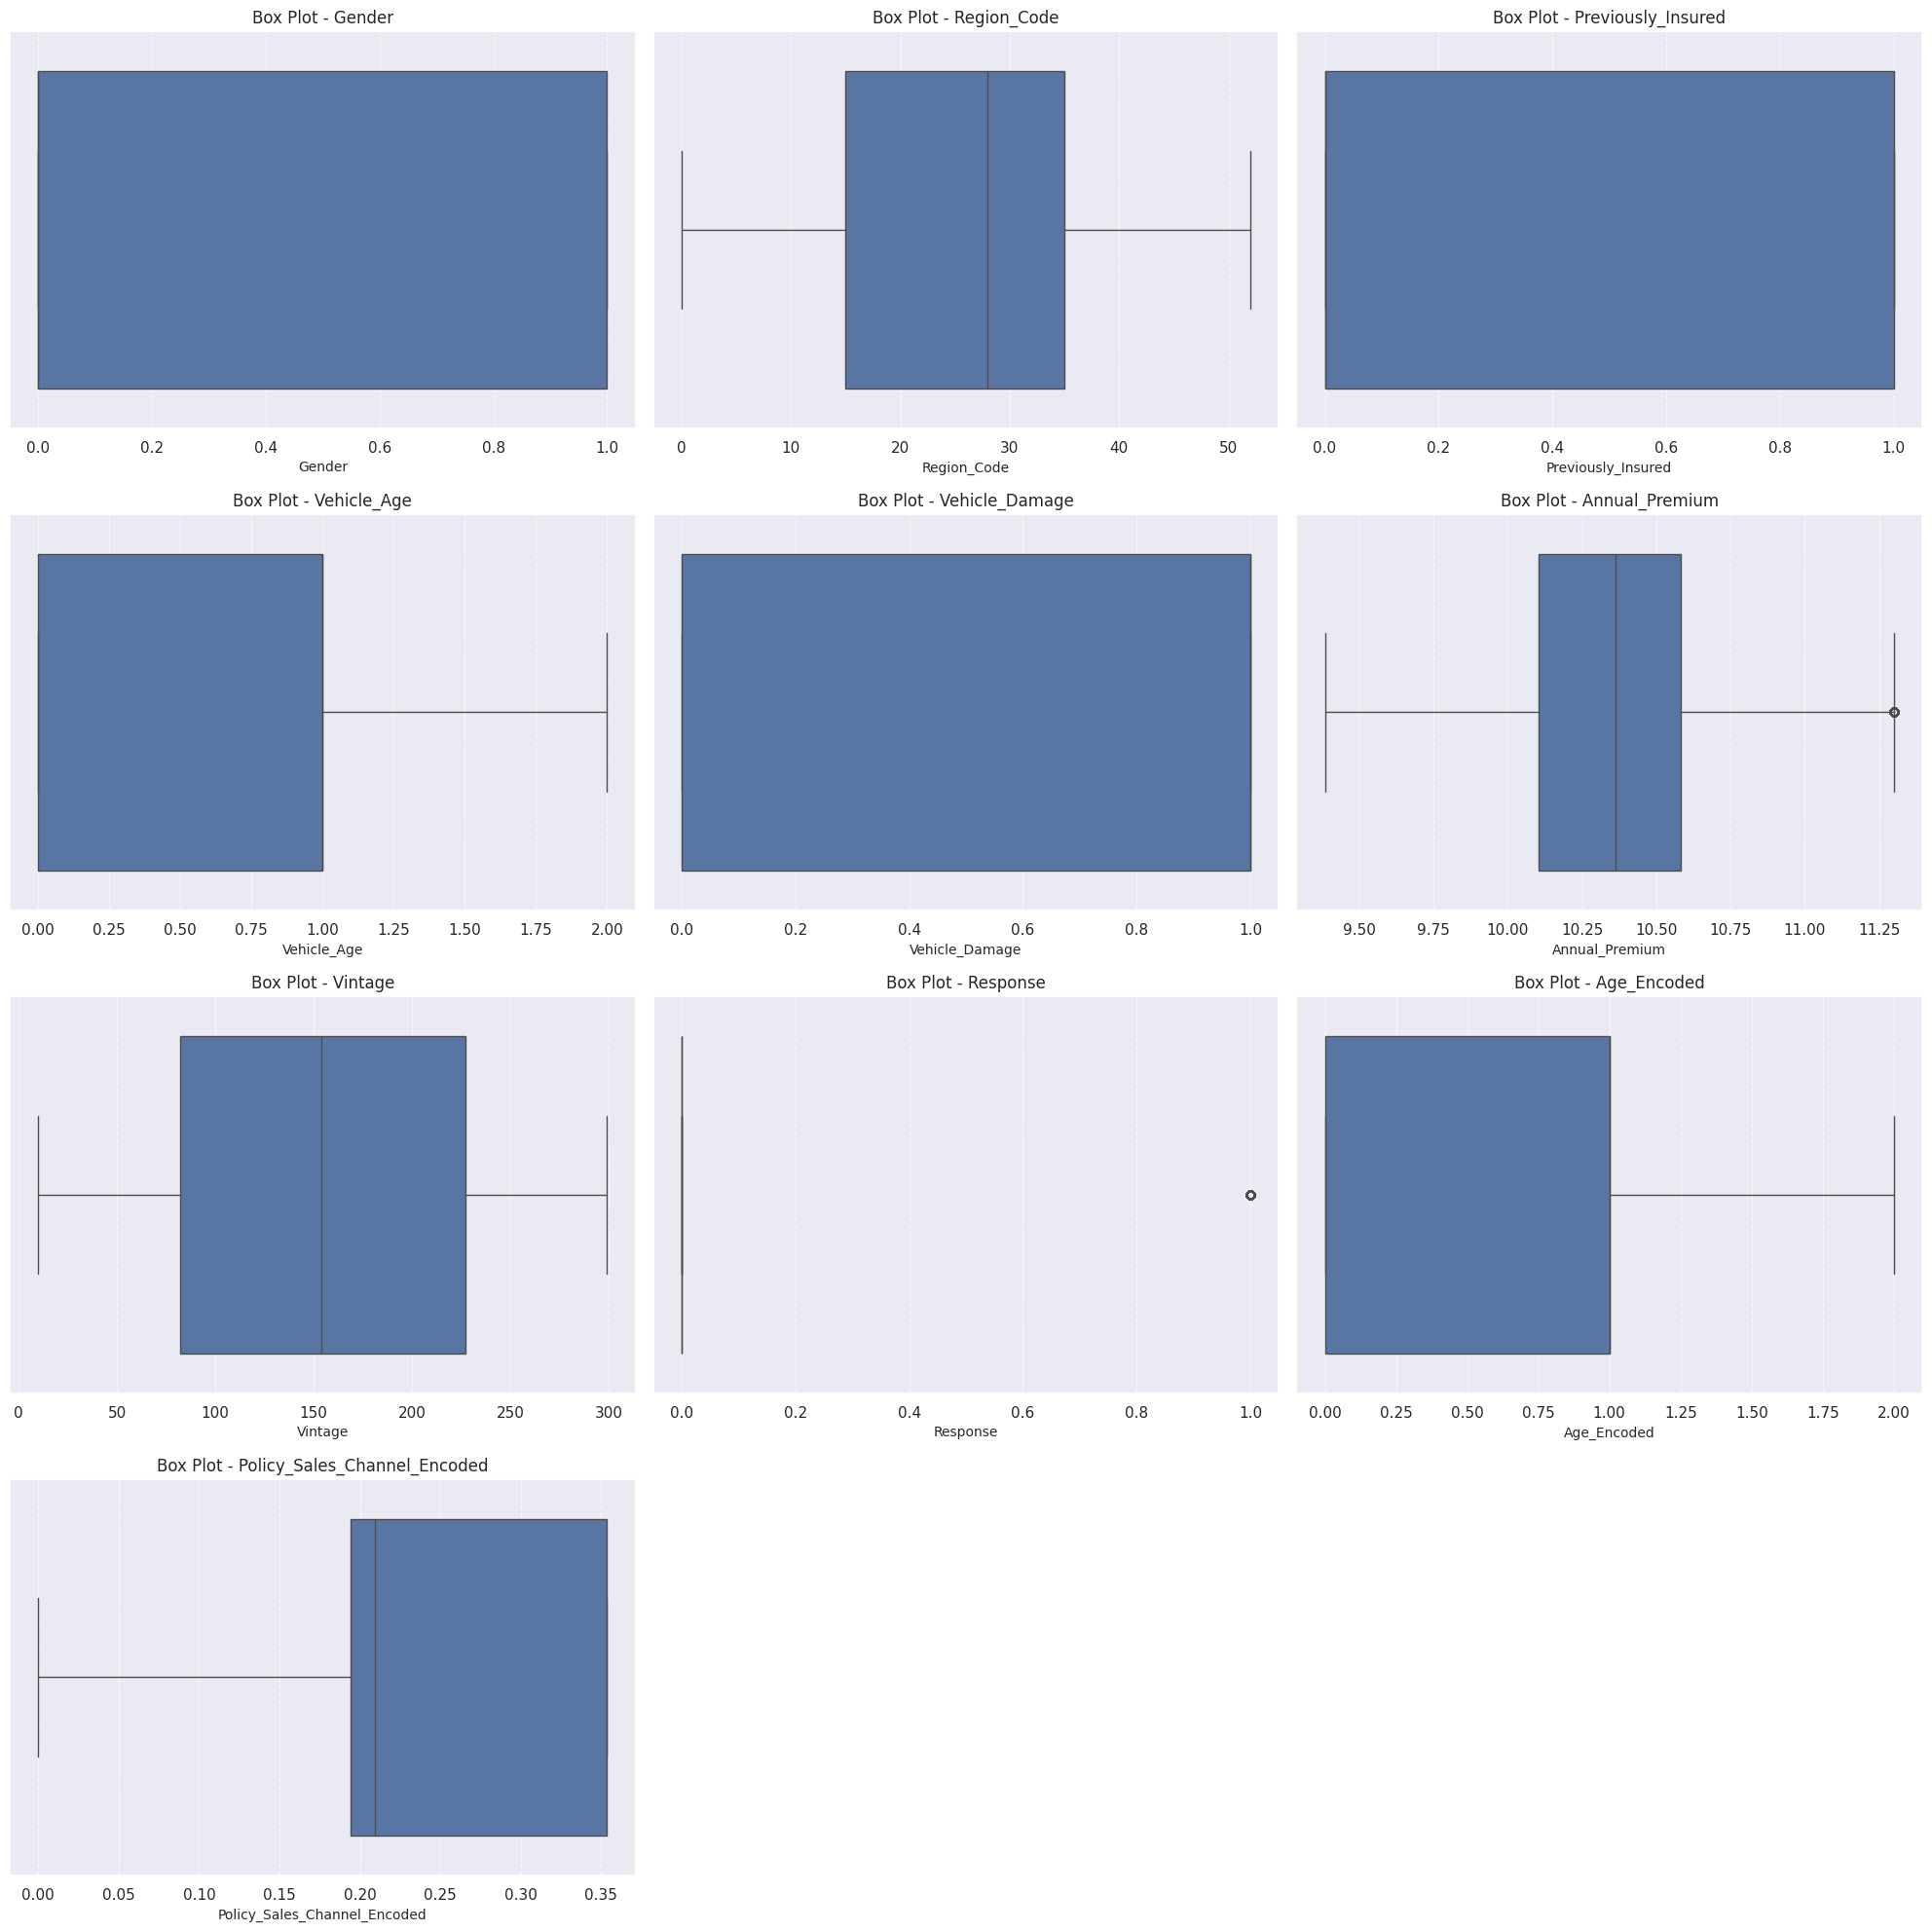

In [31]:
# Visualizing outliers
multivariate_analyzer.check_outliers_with_boxplot(outlier_treated_df)

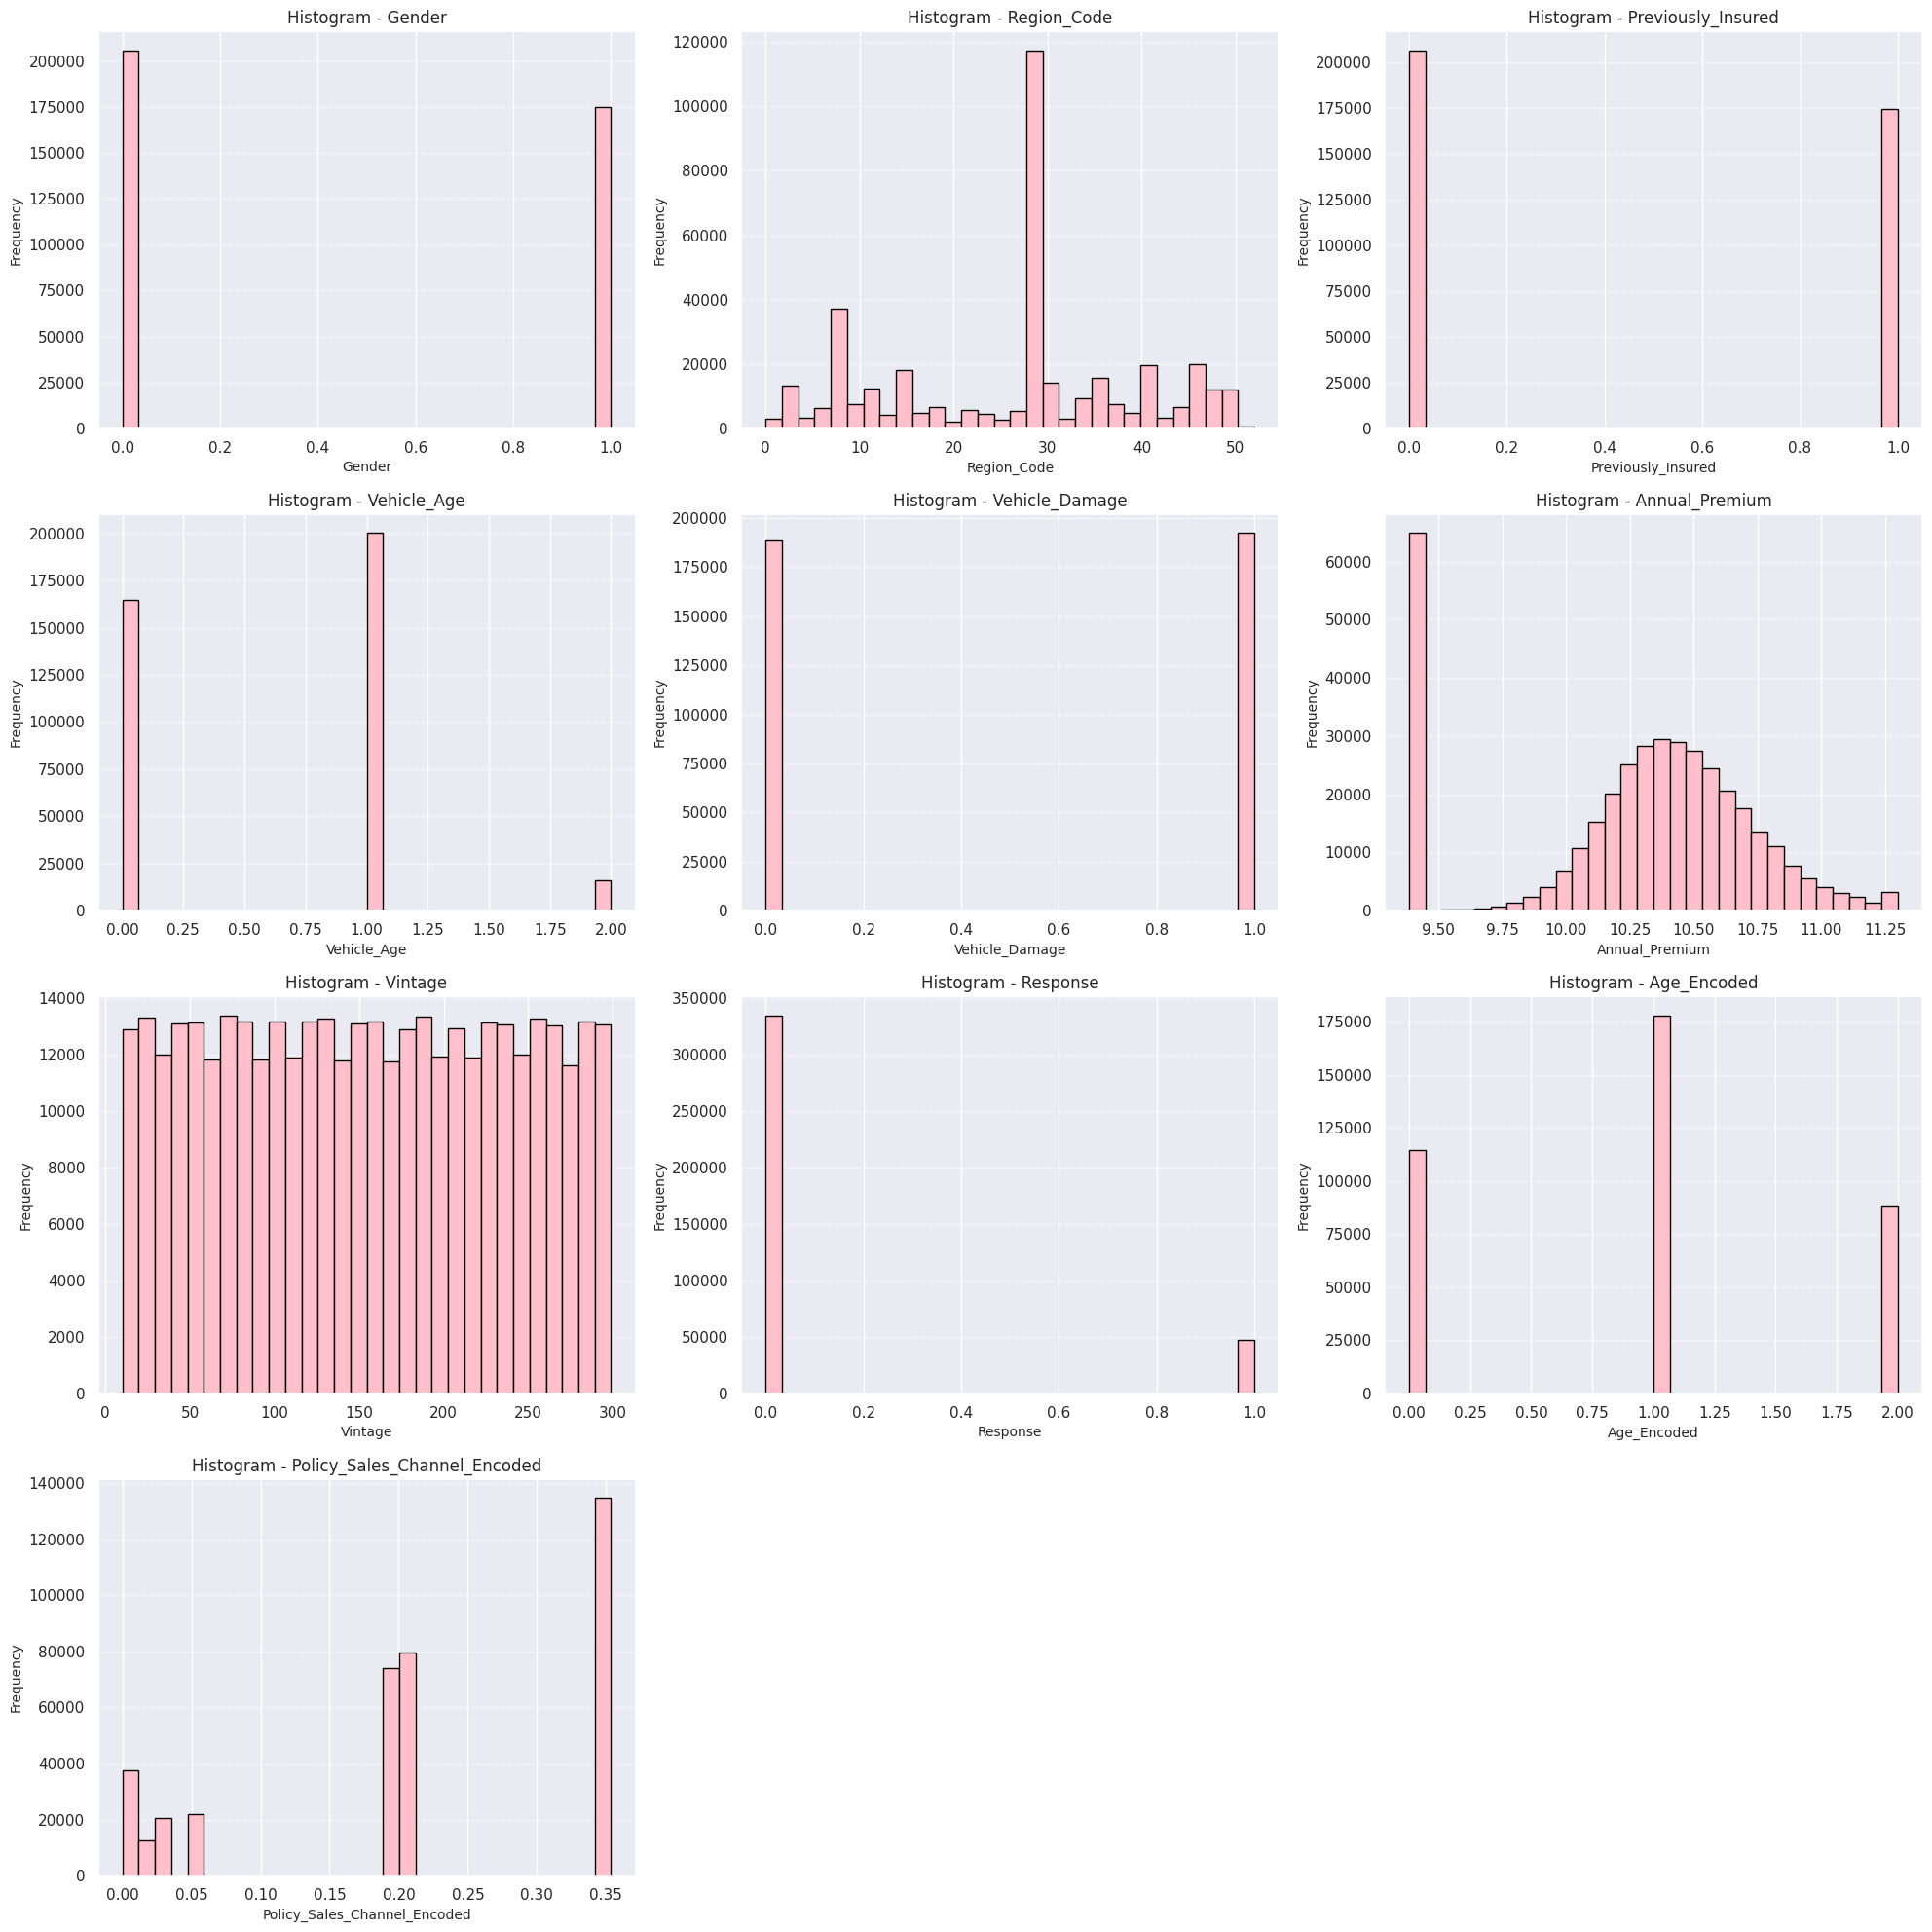

In [32]:
# Visualizing the distributions using Histogram
multivariate_analyzer.generate_histograms(outlier_treated_df)

**Insights from Data after Engineering, Outlier Handling, and Cleaning**
- All outliers across numerical columns have been correctly capped, ensuring cleaner data for modeling.
- The `Annual_Premium` column still shows an uneven distribution.
- However, most of the data in this column appears to be normally distributed.
- Further processing will involve handling the uneven distribution in `Annual_Premium`.
- Standard scaling will be applied to normalize the data for better model performance.


## Model Training and Selection

In this section, we evaluate and compare the performance of several machine learning models, both before and after hyperparameter tuning, to determine which model provides the best results for our business problem. The goal is to identify the model that not only delivers high accuracy but also maximizes recall, which is crucial for capturing as many positive cases as possible (i.e., identifying potential customers for cross-selling opportunities). We will note the Model Evaluation Metrics and Best Parameters before and after hyperparameter tuning for each model and then determine the best model.

The models tested include Logistic Regression, XGBoost, Decision Trees, Naive Bayes, Random Forest, LightGBM (LGBM), and K-Nearest Neighbors (KNN). We assessed various evaluation metrics such as accuracy, precision, recall, F1 score, and ROC AUC to get a holistic view of each model's performance. Additionally, hyperparameter tuning was applied to improve the models' effectiveness.

Here are the evaluation results for each model, before and after hyperparameter tuning:

| Model               | Accuracy | Precision | Recall  | F1 Score | ROC AUC | True Negatives | False Positives | False Negatives | True Positives |
|---------------------|----------|-----------|---------|----------|---------|----------------|-----------------|-----------------|----------------|
| Logistic Regression (Before Tuning) | 0.6442   | 0.2537    | 0.9669  | 0.4019   | 0.7828  | 59989          | 40206           | 468             | 13670          |
| Logistic Regression (After Tuning)  | 0.6442   | 0.2537    | 0.9669  | 0.4019   | 0.7828  | 59989          | 40206           | 468             | 13670          |
| XGBoost (Before Tuning)             | 0.8109   | 0.3377    | 0.5499  | 0.4184   | 0.6989  | 84944          | 15251           | 6363            | 7775           |
| XGBoost (After Tuning)              | 0.8065   | 0.3376    | 0.5866  | 0.4285   | 0.7121  | 83919          | 16276           | 5844            | 8294           |
| Decision Tree (Before Tuning)       | 0.8104   | 0.2960    | 0.3869  | 0.3354   | 0.6285  | 87185          | 13010           | 8668            | 5470           |
| Decision Tree (After Tuning)        | 0.8066   | 0.3202    | 0.5018  | 0.3909   | 0.6757  | 85131          | 15064           | 7043            | 7095           |
| Naive Bayes                         | 0.6401   | 0.2529    | 0.9777  | 0.4018   | 0.7851  | 59356          | 40839           | 315             | 13823          |
| Random Forest (After Tuning)        | 0.6801   | 0.2693    | 0.9258  | 0.4172   | 0.7856  | 64672          | 35523           | 1049            | 13089          |
| LGBM (Before Tuning)                | 0.8158   | 0.3385    | 0.5130  | 0.4079   | 0.6858  | 86023          | 14172           | 6885            | 7253           |
| LGBM (After Tuning)                 | 0.8058   | 0.3295    | 0.5513  | 0.4125   | 0.6965  | 84337          | 15858           | 6344            | 7794           |
| KNN (Before Tuning)                 | 0.7482   | 0.2786    | 0.6519  | 0.3904   | 0.7069  | 76330          | 23865           | 4921            | 9217           |
| KNN (After Tuning)                  | 0.7443   | 0.2828    | 0.6953  | 0.4021   | 0.7232  | 75265          | 24930           | 4308            | 9830           |


#### Logistic regression


##### a) Before Hyperparameter tuning:
- Model Evaluation Metrics: {'Accuracy': 0.6442496916900632, 'Precision': 0.25373078921968967, 'Recall': 0.9668977224501344, 'F1 Score': 0.40197606375158057, 'ROC AUC': 0.7828101067962034, 'True Negatives': 59989, 'False Positives': 40206, 'False Negatives': 468, 'True Positives': 13670}

##### b) After Hyperparameter tuning:

- Best parameters: {'penalty': 'elasticnet', 'l1_ratio': 0.5, 'C': 1}

- Model Evaluation Metrics: {'Accuracy': 0.6442496916900632, 'Precision': 0.25373078921968967, 'Recall': 0.9668977224501344, 'F1 Score': 0.40197606375158057, 'ROC AUC': 0.7828101067962034, 'True Negatives': 59989, 'False Positives': 40206, 'False Negatives': 468, 'True Positives': 13670}
 
#### XGboost

##### a) Before Hyperparameter tuning:
- Model Evaluation Metrics: {'Accuracy': 0.8109557170720615, 'Precision': 0.3376617736471815, 'Recall': 0.5499363417739426, 'F1 Score': 0.41841567107953936, 'ROC AUC': 0.6988615787416548, 'True Negatives': 84944, 'False Positives': 15251, 'False Negatives': 6363, 'True Positives': 7775}

##### b) After Hyperparameter tuning:

- xgboost_param_grid = {'n_estimators': [100, 200, 300],'max_depth': [3, 5, 7],'learning_rate': [0.01, 0.1, 0.2],'subsample': [0.8, 1.0],'colsample_bytree': [0.8, 1.0],'gamma': [0, 0.1, 0.3],'min_child_weight': [1, 3],'reg_alpha': [0, 0.1],'reg_lambda': [1, 1.5]}
- Best parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.8}
- Model Evaluation Metrics:{'Accuracy': 0.8065300481925604, 'Precision': 0.33756613756613757, 'Recall': 0.5866459188003961, 'F1 Score': 0.4285419034824842, 'ROC AUC': 0.712101341554996, 'True Negatives': 83919, 'False Positives': 16276, 'False Negatives': 5844, 'True Positives': 8294}
 
#### Decision Trees
##### a) Before Hyperparameter tuning:
- Model Evaluation Metrics: {'Accuracy': 0.8103959486762352, 'Precision': 0.295995670995671, 'Recall': 0.38690055170462584, 'F1 Score': 0.3353976332086578, 'ROC AUC': 0.6285268764810867, 'True Negatives': 87185, 'False Positives': 13010, 'False Negatives': 8668, 'True Positives': 5470}
##### b) After Hyperparameter tuning:
- Best parameters: {'min_samples_split': 5, 'max_depth': 20, 'criterion': 'entropy'}

- Model Evaluation Metrics: {'Accuracy': 0.8066437511479625, 'Precision': 0.3201859289679137, 'Recall': 0.501839015419437, 'F1 Score': 0.39094140011571205, 'ROC AUC': 0.67574609586282, 'True Negatives': 85131, 'False Positives': 15064, 'False Negatives': 7043, 'True Positives': 7095}
 
#### Naive Bayes 

- Model Evaluation Metrics: {'Accuracy': 0.6400514287213666, 'Precision': 0.2528813435293257, 'Recall': 0.9777196208798982, 'F1 Score': 0.4018313953488372, 'ROC AUC': 0.7850622157495952, 'True Negatives': 59356, 'False Positives': 40839, 'False Negatives': 315, 'True Positives': 13823}
 
#### Random Forest
 
##### b) After Hyperparameter tuning:
- Best parameters: {"max_depth":4, "max_features":'sqrt',"min_samples_leaf":0.06,"min_samples_split":25}

- Model Evaluation Metrics: {'Accuracy': 0.6801273473100504, 'Precision': 0.2692545050604789, 'Recall': 0.9258028009619466, 'F1 Score': 0.4171792828685259, 'ROC AUC': 0.7856320756643658, 'True Negatives': 64672, 'False Positives': 35523, 'False Negatives': 1049, 'True Positives': 13089}
 
#### LGBM
##### a) Before Hyperparameter tuning:
- Model Evaluation Metrics: {'Accuracy': 0.8158274513919865, 'Precision': 0.3385297549591599, 'Recall': 0.5130145706606309, 'F1 Score': 0.40789584680707475, 'ROC AUC': 0.6857851934095609, 'True Negatives': 86023, 'False Positives': 14172, 'False Negatives': 6885, 'True Positives': 7253}
##### b) After Hyperparameter tuning:
- Best parameters: {'n_estimators': 100, 'min_data_in_leaf': 250, 'max_depths': 3.0, 'learning_rate': 0.001}

- Model Evaluation Metrics: {'Accuracy': 0.805812844935408, 'Precision': 0.3295281582952816, 'Recall': 0.5512802376573773, 'F1 Score': 0.41249007673987825, 'ROC AUC': 0.6965044334152448, 'True Negatives': 84337, 'False Positives': 15858, 'False Negatives': 6344, 'True Positives': 7794}
 
#### KNN
##### a) Before Hyperparameter tuning:
- Model Evaluation Metrics: {'Accuracy': 0.7482266712147849, 'Precision': 0.27861072486548577, 'Recall': 0.6519309661904088, 'F1 Score': 0.3903854299025836, 'ROC AUC': 0.7068727139949498, 'True Negatives': 76330, 'False Positives': 23865, 'False Negatives': 4921, 'True Positives': 9217}
##### b) After Hyperparameter tuning:
- Best parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 9}

- Model Evaluation Metrics: {'Accuracy': 0.7442733069192622, 'Precision': 0.2827963176064442, 'Recall': 0.6952892912717499, 'F1 Score': 0.4020614340054808, 'ROC AUC': 0.7232372400767153, 'True Negatives': 75265, 'False Positives': 24930, 'False Negatives': 4308, 'True Positives': 9830}


### Best Model Selection:

After evaluating several models, we observed that models like XGBoost and LGBM provided higher accuracy, they missed significantly more positive cases compared to Logistic Regression and Naive Bayes. Since reducing false negatives is critical for our business (to avoid missing out on cross-selling opportunities), models with high recall are more suitable.

Although Naive Bayes had the highest recall, we decided to choose Logistic Regression as our final model. Logistic Regression provided a balanced performance with a high recall of 0.9669 while maintaining simplicity and interpretability. This makes it easier to explain the model's behavior to stakeholders and implement it effectively.

By using `Logistic Regression`, we ensure that the model is capable of identifying almost all potential customers for cross-selling while being easy to deploy and maintain.